



<h1><b> Parkinson's Disease Prediction using Machine Learning <b><h1>


<h3>Dinesh Kumar. C <br>
23MCA0173<h3>

**1) Import Necessary Libraries & Modules**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from collections import Counter
import joblib

**2) Load Dataset**

In [2]:
dataset = pd.read_csv("PD_dataset.csv")
dataset.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


**3) Exploratory Data Analysis (EDA)**

3.1)

*   Shape of Dataset
*   Target variable
*   Columns Name with datatype
    

In [ ]:
# Print dataset shape in a visually appealing format
print("\nDataset Shape:")
print(f"Total Rows: {dataset.shape[0]}")
print(f"Total Columns: {dataset.shape[1]}")
print("--------------------------------------")

# Print numerical count of target variable
print("\nTarget Variable (Diagnosis) Distribution:")
print(dataset["Diagnosis"].value_counts())
print("--------------------------------------")

# Create DataFrame with column names and data types
columns_df = pd.DataFrame({"Column Name": dataset.columns, "Data Type": dataset.dtypes.values})
# Print in tabular format
print("\nDataset Column Names and Data Types:")
print(tabulate(columns_df, headers="keys", tablefmt="pretty"))


Dataset Shape:
Total Rows: 2105
Total Columns: 35
--------------------------------------

Target Variable (Diagnosis) Distribution:
Diagnosis
1    1304
0     801
Name: count, dtype: int64
--------------------------------------

Dataset Column Names and Data Types:
+----+--------------------------+-----------+
|    |       Column Name        | Data Type |
+----+--------------------------+-----------+
| 0  |        PatientID         |   int64   |
| 1  |           Age            |   int64   |
| 2  |          Gender          |   int64   |
| 3  |        Ethnicity         |   int64   |
| 4  |      EducationLevel      |   int64   |
| 5  |           BMI            |  float64  |
| 6  |         Smoking          |   int64   |
| 7  |    AlcoholConsumption    |  float64  |
| 8  |     PhysicalActivity     |  float64  |
| 9  |       DietQuality        |  float64  |
| 10 |       SleepQuality       |  float64  |
| 11 | FamilyHistoryParkinsons  |   int64   |
| 12 |   TraumaticBrainInjury   |   int64   

3.2) Age Distribution

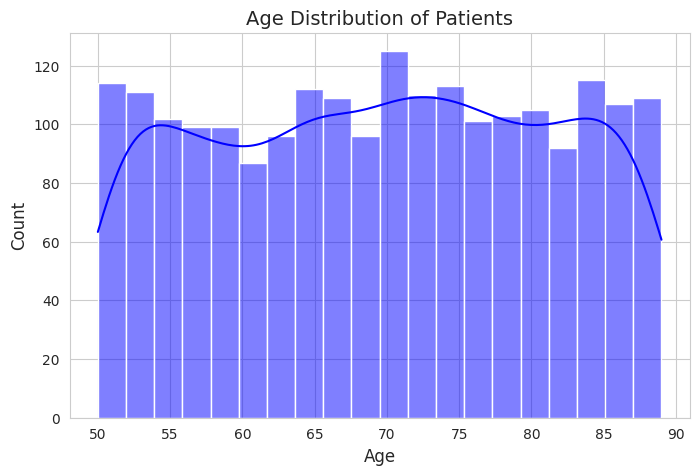

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(dataset["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

3.3) Gender Distribution

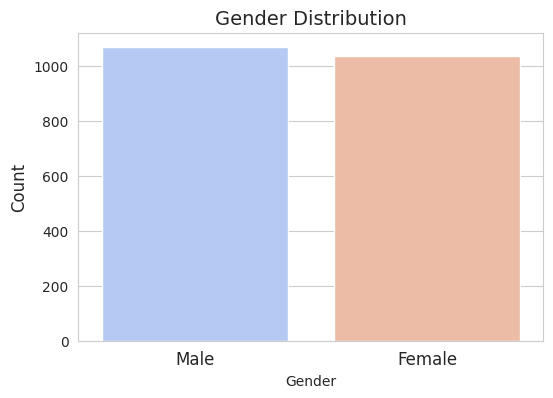

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=dataset, hue="Gender", palette="coolwarm", legend=False)
plt.title("Gender Distribution", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

3.4) BMI Distribution

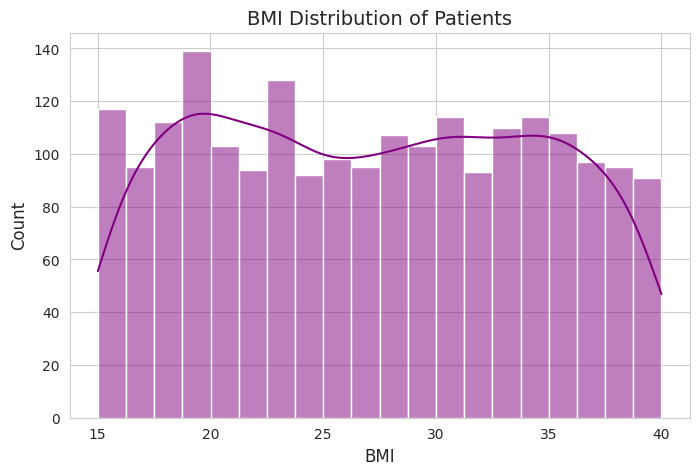

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset["BMI"], bins=20, kde=True, color="purple")
plt.title("BMI Distribution of Patients", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

3.5) Disease Diagnosis Count

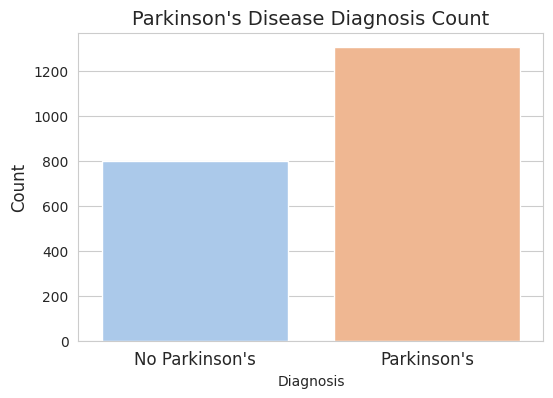

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Diagnosis", data=dataset, hue="Diagnosis", palette="pastel", legend=False)
plt.title("Parkinson's Disease Diagnosis Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["No Parkinson's", "Parkinson's"], fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**4) Data Pre-Processing**

4.1) Handling Missing Values

In [ ]:
# Handling Missing Values
print("\nMethod 1: Handling Missing Values")
missing_values = dataset.isnull().sum()
if missing_values.any():
    dataset.fillna(dataset.median(numeric_only=True), inplace=True)
    print("Missing values handled successfully.")
else:
    print("No missing values found.")


Method 1: Handling Missing Values
No missing values found.


4.2) Drop Irrelevant Columns

In [ ]:
# Drop Irrelevant Columns
print("\nMethod 2: Dropping Irrelevant Columns")
drop_columns = ["PatientID", "DoctorInCharge"]
dataset.drop(columns=drop_columns, errors='ignore', inplace=True)
print("Irrelevant columns dropped successfully.")


Method 2: Dropping Irrelevant Columns
Irrelevant columns dropped successfully.


4.3) Handling Outliers using IQR Method




In [ ]:
# Handling Outliers using IQR Method
print("\nMethod 3: Handling Outliers using IQR Method")
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

dataset = remove_outliers_iqr(dataset)
print("Outliers handled successfully.")


Method 3: Handling Outliers using IQR Method
Outliers handled successfully.


4.4) Feature Scaling using StandardScaler

In [ ]:
# Feature Scaling using StandardScaler
print("\nMethod 4: Feature Scaling using StandardScaler")
scaler = StandardScaler()
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset.loc[:, numerical_features] = scaler.fit_transform(dataset[numerical_features])
print("Feature scaling applied successfully.")


Method 4: Feature Scaling using StandardScaler
Feature scaling applied successfully.


<ipython-input-51-eaac5b24d767>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16135313 -0.07493716  0.18431076  0.27072673  0.96205452  1.13488646
  0.96205452 -0.67984897 -0.85268092 -0.593433   -1.5440087  -1.45759273
 -1.63042467  1.56696633 -0.93909689 -0.16135313  1.56696633 -0.24776911
 -0.16135313 -1.11192883 -0.16135313 -0.85268092  0.44355868 -1.45759273
 -1.37117675  1.39413438  0.44355868 -0.33418508  0.09789479  1.22130243
 -1.71684064  0.7028066   1.39413438 -1.28476078  0.96205452  0.7028066
 -1.28476078 -1.11192883 -1.19834481  1.56696633 -1.5440087  -1.02551286
  0.27072673  0.78922257 -0.93909689 -0.85268092  0.01147881  0.52997465
  0.27072673  0.87563854 -1.63042467 -1.5440087   0.96205452  0.09789479
 -0.76626494  1.39413438  1.48055035 -0.593433    0.52997465  0.27072673
  0.35714271  1.48055035  1.56696633  0.01147881 -0.42060105  1.39413438
 -1.45759273  0.7028066   1.13488646 -1.11192

4.5) Encode Categorical Variables

In [ ]:
# Encode Gender if present
print("\nMethod 5: Encode Categorical Variables")
if 'Gender' in dataset.columns:
    le = LabelEncoder()
    dataset.loc[:, 'Gender'] = le.fit_transform(dataset['Gender'])
print("Encoded applied successfully.")


Method 5: Encode Categorical Variables
Encoded applied successfully.


4.6) Summary of Data Pre-Processing

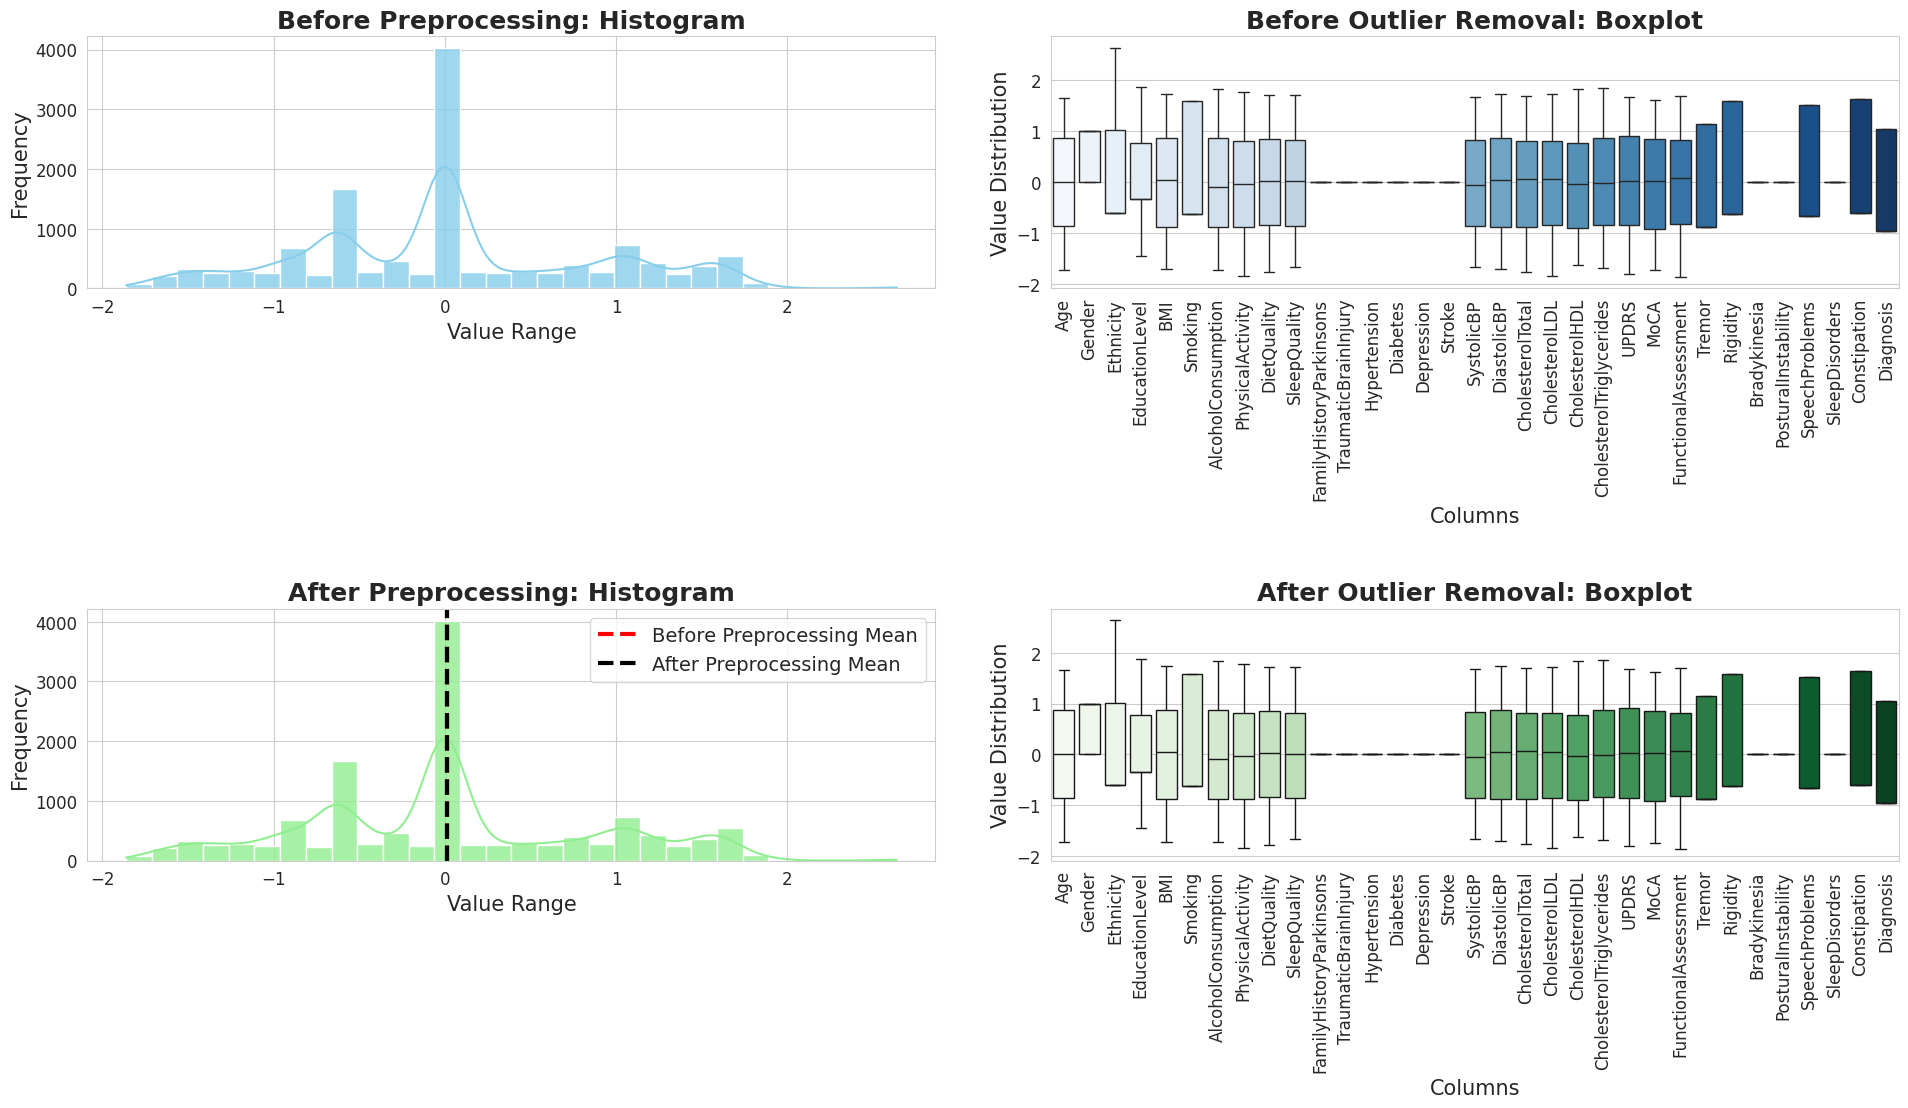


Preprocessing Summary:
1. Missing values handling: Success
2. Dropped irrelevant columns: Success
3. Outliers handled using IQR: Success
4. Feature scaling applied: Success
5. Encode applied: Success


In [ ]:
# Create copies of the dataset for visualization
original_dataset = dataset.copy()
dataset_before_outliers = dataset.copy()

# Visualizing Changes Before and After Preprocessing
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Larger figure size for better clarity

# Histogram Before Preprocessing
sns.histplot(dataset_before_outliers.select_dtypes(include=['int64', 'float64']).values.flatten(),
             bins=30, color='skyblue', alpha=0.8, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Before Preprocessing: Histogram", fontsize=18, weight='bold')
axes[0, 0].set_xlabel("Value Range", fontsize=15)
axes[0, 0].set_ylabel("Frequency", fontsize=15)
axes[0, 0].tick_params(axis='x', labelsize=12)
axes[0, 0].tick_params(axis='y', labelsize=12)

# Boxplot Before Outlier Removal
sns.boxplot(data=dataset_before_outliers.select_dtypes(include=['int64', 'float64']), ax=axes[0, 1],
            palette='Blues')
axes[0, 1].set_title("Before Outlier Removal: Boxplot", fontsize=18, weight='bold')
axes[0, 1].set_xlabel("Columns", fontsize=15)
axes[0, 1].set_ylabel("Value Distribution", fontsize=15)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=12)
axes[0, 1].tick_params(axis='y', labelsize=12)

# Histogram After Preprocessing
sns.histplot(dataset.select_dtypes(include=['int64', 'float64']).values.flatten(),
             bins=30, color='lightgreen', alpha=0.8, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("After Preprocessing: Histogram", fontsize=18, weight='bold')
axes[1, 0].set_xlabel("Value Range", fontsize=15)
axes[1, 0].set_ylabel("Frequency", fontsize=15)
axes[1, 0].tick_params(axis='x', labelsize=12)
axes[1, 0].tick_params(axis='y', labelsize=12)

# Boxplot After Outlier Removal with Marked Changes
sns.boxplot(data=dataset.select_dtypes(include=['int64', 'float64']), ax=axes[1, 1], palette='Greens')
axes[1, 1].set_title("After Outlier Removal: Boxplot", fontsize=18, weight='bold')
axes[1, 1].set_xlabel("Columns", fontsize=15)
axes[1, 1].set_ylabel("Value Distribution", fontsize=15)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=12)
axes[1, 1].tick_params(axis='y', labelsize=12)

# Mark changes in outliers with red circles
for column in dataset.select_dtypes(include=['int64', 'float64']).columns:
    before = dataset_before_outliers[column]
    after = dataset[column]
    removed_outliers = before[~before.isin(after)]
    if not removed_outliers.empty:
        for val in removed_outliers:
            axes[1, 1].scatter(dataset.columns.get_loc(column), val, color='red', marker='o', s=80,
                               alpha=0.7, edgecolors='black', linewidth=2)

# Calculate the mean of all values in the numerical columns (flattened)
mean_before = dataset_before_outliers.select_dtypes(include=['int64', 'float64']).values.flatten().mean()
mean_after = dataset.select_dtypes(include=['int64', 'float64']).values.flatten().mean()

# Mark changes in histogram with red and black dashed lines (representing before and after means)
axes[1, 0].axvline(mean_before, color='red', linestyle='dashed', linewidth=3, label='Before Preprocessing Mean')
axes[1, 0].axvline(mean_after, color='black', linestyle='dashed', linewidth=3, label='After Preprocessing Mean')
axes[1, 0].legend(fontsize=14, loc='upper right')

# Tight layout adjustment with padding to avoid overlap
plt.tight_layout(pad=4.0)

plt.show()

# Summary of preprocessing success
print("\nPreprocessing Summary:")
print("1. Missing values handling: Success")
print("2. Dropped irrelevant columns: Success")
print("3. Outliers handled using IQR: Success")
print("4. Feature scaling applied: Success")
print("5. Encode applied: Success")

**5) Feature Selection**

In [ ]:
X = dataset.drop(columns=['Diagnosis'], errors='ignore')
y = dataset['Diagnosis'] if 'Diagnosis' in dataset.columns else None

# Ensure y is properly encoded
if y is not None and y.dtype == 'float64':
    y = LabelEncoder().fit_transform(y.astype(str))

5.1) Univariate Selection

In [ ]:
# Selection (SelectKBest)
X_cleaned = X.loc[:, X.var() != 0]  # Remove features with zero variance

# Ensure no NaN or infinite values
X_cleaned = X_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Apply Univariate Selection (SelectKBest)
print("\nMethod 1: Univariate Selection")
selector1 = SelectKBest(score_func=f_classif, k=10)
selector1.fit(X_cleaned, y)

# Get the selected features
features1 = set(X_cleaned.columns[selector1.get_support()])
print("Selected Features (Univariate):", features1)


Method 1: Univariate Selection
Selected Features (Univariate): {'AlcoholConsumption', 'UPDRS', 'CholesterolLDL', 'SystolicBP', 'Age', 'Tremor', 'FunctionalAssessment', 'MoCA', 'SleepQuality', 'Rigidity'}


5.2) Mutual Information

In [ ]:
print("\nMethod 2: Mutual Information")
selector2 = SelectKBest(score_func=mutual_info_classif, k=10)
selector2.fit(X, y)
features2 = set(X.columns[selector2.get_support()])
print("Selected Features (Mutual Information):", features2)


Method 2: Mutual Information
Selected Features (Mutual Information): {'BMI', 'UPDRS', 'CholesterolTotal', 'Tremor', 'SpeechProblems', 'Constipation', 'FunctionalAssessment', 'TraumaticBrainInjury', 'MoCA', 'Rigidity'}


5.3) Lasso Regression

In [ ]:
print("\nMethod 3: Lasso Regression")
lasso = LassoCV(cv=5, random_state=42).fit(X, y)
feature_importance_lasso = pd.Series(np.abs(lasso.coef_), index=X.columns)
features3 = set(feature_importance_lasso.nlargest(10).index)
print("Selected Features (Lasso):", features3)


Method 3: Lasso Regression
Selected Features (Lasso): {'AlcoholConsumption', 'UPDRS', 'CholesterolTotal', 'Tremor', 'Age', 'SystolicBP', 'FunctionalAssessment', 'MoCA', 'SleepQuality', 'Rigidity'}


5.4) Correlation-based Selection

In [ ]:
print("\nMethod 4: Correlation-based Selection")
corr_matrix = dataset.corr()
target_corr = abs(corr_matrix["Diagnosis"]).sort_values(ascending=False)
features4 = set(target_corr.iloc[1:11].index)
print("Selected Features (Correlation-based):", features4)


Method 4: Correlation-based Selection
Selected Features (Correlation-based): {'AlcoholConsumption', 'UPDRS', 'CholesterolLDL', 'Tremor', 'Age', 'SystolicBP', 'FunctionalAssessment', 'MoCA', 'SleepQuality', 'Rigidity'}


5.5) Top 5 Most Contributing Features


Top 5 Most Contributing Features:
1. UPDRS
2. Tremor
3. FunctionalAssessment
4. MoCA
5. Rigidity


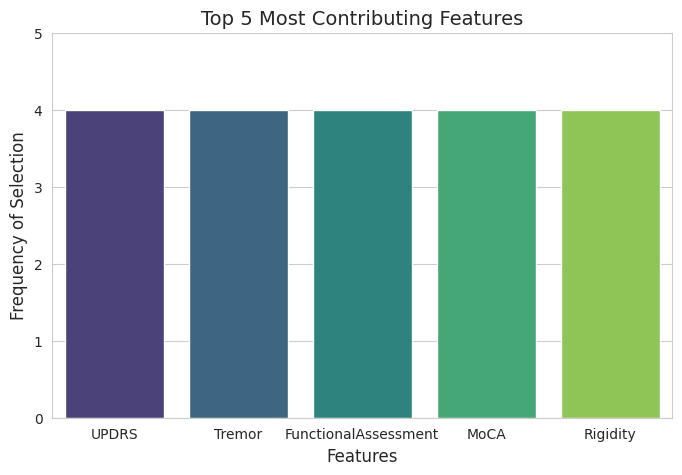

In [ ]:
# Determining Top 5 Most Contributing Features with Visualization

# Count occurrences of each feature across the four methods
feature_counts = {}
all_features = [features1, features2, features3, features4]

for feature_set in all_features:
    for feature in feature_set:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

# Sort features by occurrence (descending order)
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 most frequently selected features
top5_features = [feature[0] for feature in sorted_features[:5]]
top5_counts = [feature[1] for feature in sorted_features[:5]]

# Print the top 5 contributing features
print("\nTop 5 Most Contributing Features:")
for i, feature in enumerate(top5_features, 1):
    print(f"{i}. {feature}")

# Plotting the top 5 features with their occurrence counts
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_features, y=top5_counts, hue=top5_features, palette="viridis", legend=False)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Frequency of Selection", fontsize=12)
plt.title("Top 5 Most Contributing Features", fontsize=14)
plt.ylim(0, 5)  # Maximum frequency is 4 (if selected in all methods)
plt.show()


**6) Model Evaluation**

6.1) Train-Test Split with SMOTEENN Balancing

In [ ]:
# Define input features (X) and target variable (y)
X_all_features = dataset.drop(columns=['Diagnosis'], errors='ignore')  # Without Feature Selection (All features)
X_selected_features = dataset[top5_features]  # With Feature Selection (Top 5 Features)
y = dataset['Diagnosis'].astype(int)

# Splitting Dataset into Train-Test Splits
splits = {
    "80-20": 0.2,
    "70-30": 0.3,
    "60-40": 0.4
}

# Dictionary to store train-test splits
X_train_all, X_test_all, y_train_all, y_test_all = {}, {}, {}, {}
X_train_selected, X_test_selected, y_train_selected, y_test_selected = {}, {}, {}, {}

for split_name, test_size in splits.items():
    X_train_all[split_name], X_test_all[split_name], y_train_all[split_name], y_test_all[split_name] = train_test_split(
        X_all_features, y, test_size=test_size, random_state=42
    )

    X_train_selected[split_name], X_test_selected[split_name], y_train_selected[split_name], y_test_selected[split_name] = train_test_split(
        X_selected_features, y, test_size=test_size, random_state=42
    )

# Apply SMOTEENN for Class Balancing
smote_enn = SMOTEENN(random_state=42)

X_train_all_bal, y_train_all_bal = {}, {}
X_train_selected_bal, y_train_selected_bal = {}, {}

for split in splits.keys():
    X_train_all_bal[split], y_train_all_bal[split] = smote_enn.fit_resample(X_train_all[split], y_train_all[split])
    X_train_selected_bal[split], y_train_selected_bal[split] = smote_enn.fit_resample(X_train_selected[split], y_train_selected[split])

print("\n✅ Train-Test Split and Balancing Completed Successfully!")


✅ Train-Test Split and Balancing Completed Successfully!


6.2 Random Forest


🔹 Training Random Forest on 80-20 Split...

🔹 Training Random Forest on 70-30 Split...

🔹 Training Random Forest on 60-40 Split...


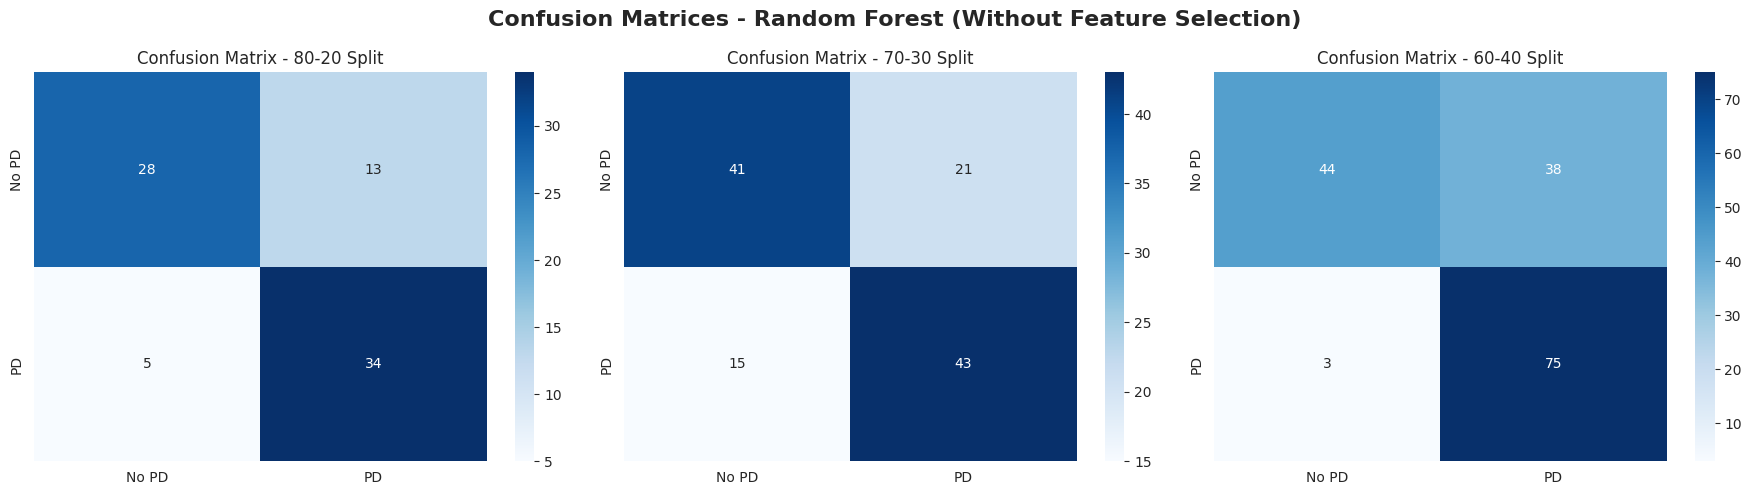

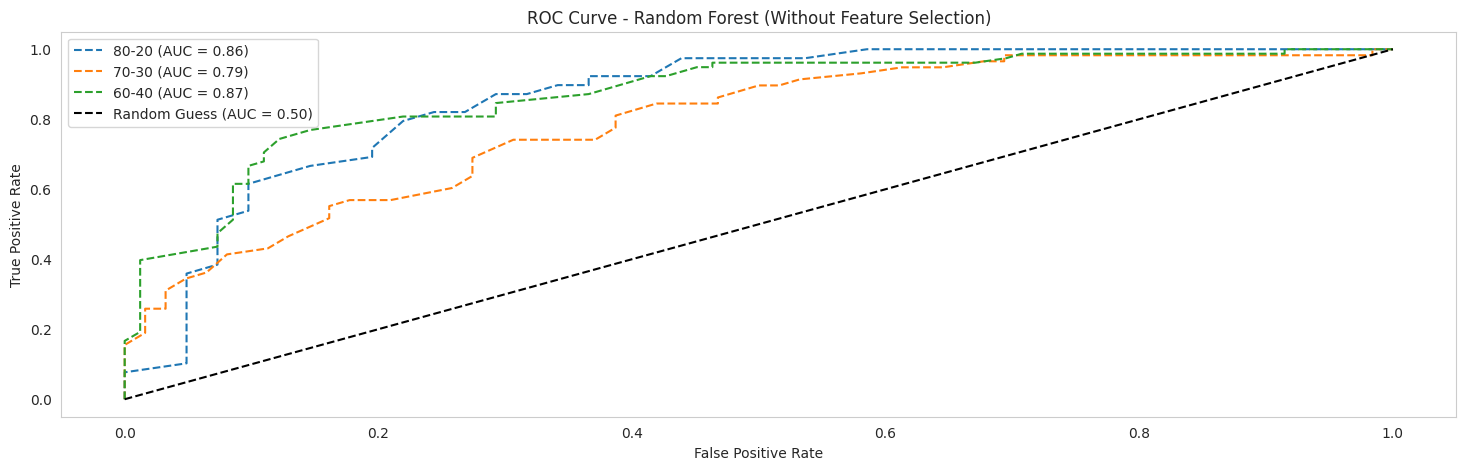


🔹 Random Forest Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20   0.77500   0.723404  0.871795  0.790698  0.860225
70-30   0.70000   0.671875  0.741379  0.704918  0.788237
60-40   0.74375   0.663717  0.961538  0.785340  0.870622

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


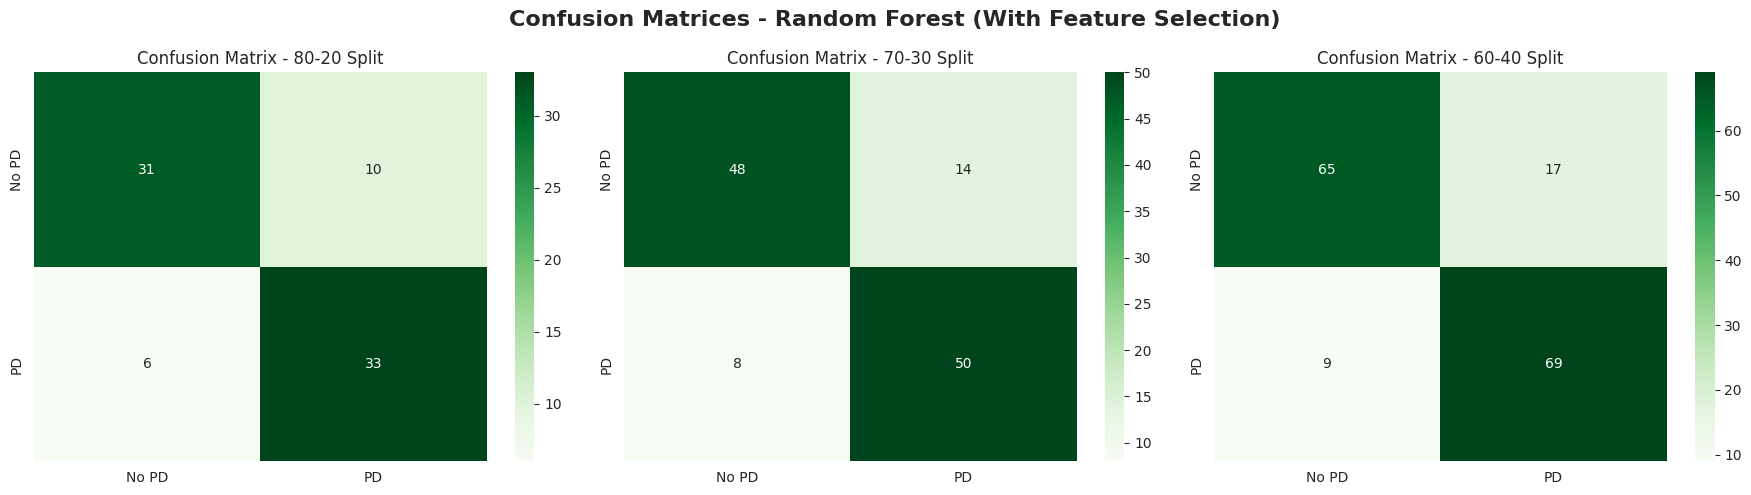

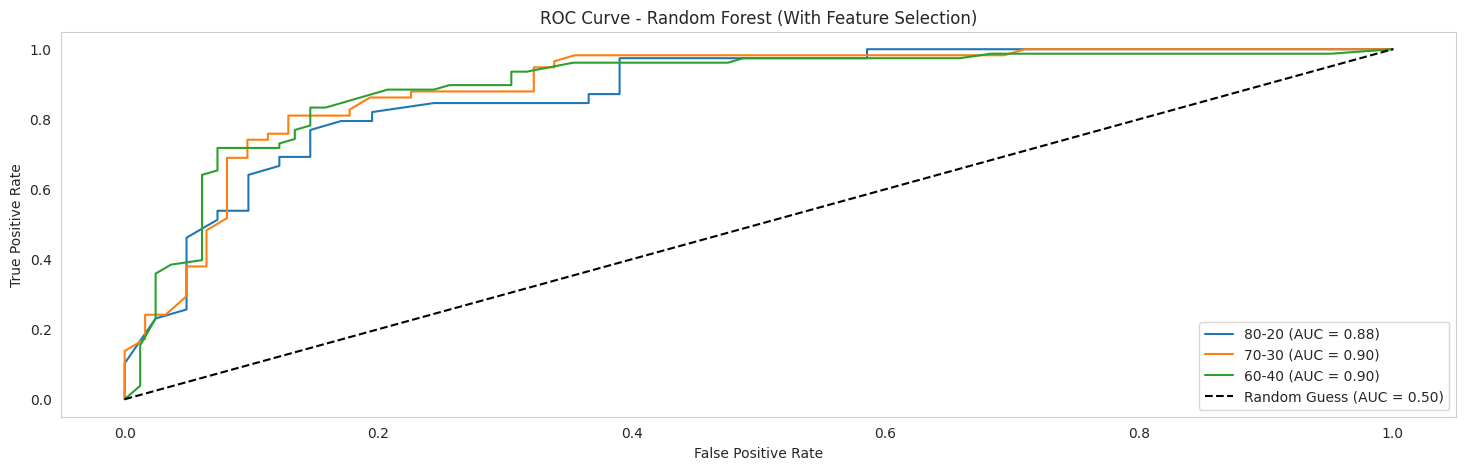


🔹 Random Forest Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.800000   0.767442  0.846154  0.804878  0.876173
70-30  0.816667   0.781250  0.862069  0.819672  0.896135
60-40  0.837500   0.802326  0.884615  0.841463  0.895872

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 80-20
   - Accuracy: 0.78%
   - AUC: 0.86%

✅ [WITH FEATURE SELECTION]

 - Best Split: 60-40
   - Accuracy: 0.84%
   - AUC: 0.90%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.84%, AUC: 0.90%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Function to train and evaluate the Random Forest model
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
rf_results_all = {}
rf_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training Random Forest on {split} Split...")

    # Train on all features (Without Feature Selection)
    rf_results_all[split] = train_evaluate_rf(X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split])

    # Train on selected features (With Feature Selection - Top 5 Features)
    rf_results_selected[split] = train_evaluate_rf(X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split])

# Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
rf_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": rf_results_all[split][1],
        "Precision": rf_results_all[split][2],
        "Recall": rf_results_all[split][3],
        "F1-Score": rf_results_all[split][4],
        "AUC": rf_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Random Forest (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(rf_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in rf_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Random Forest (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Random Forest Performance WITHOUT Feature Selection:")
print(rf_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

rf_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": rf_results_selected[split][1],
        "Precision": rf_results_selected[split][2],
        "Recall": rf_results_selected[split][3],
        "F1-Score": rf_results_selected[split][4],
        "AUC": rf_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Random Forest (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(rf_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in rf_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Random Forest (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Random Forest Performance WITH Feature Selection:")
print(rf_metrics_df_selected)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = rf_metrics_df_all["Accuracy"].idxmax()
best_acc_all = rf_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = rf_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = rf_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = rf_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = rf_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
rf_metrics_df_all = rf_metrics_df_all * 100
rf_metrics_df_selected = rf_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")

print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")

print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")
print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


6.3) AdaBoost


🔹 Training AdaBoost on 80-20 Split...

🔹 Training AdaBoost on 70-30 Split...

🔹 Training AdaBoost on 60-40 Split...


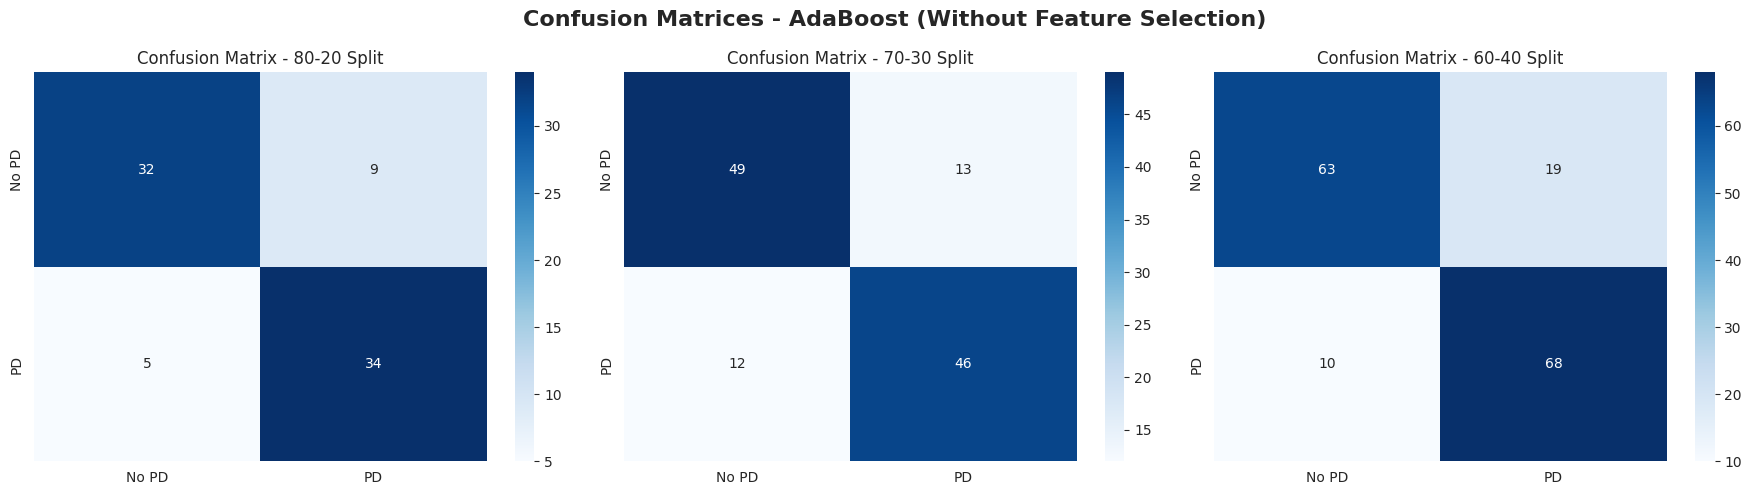

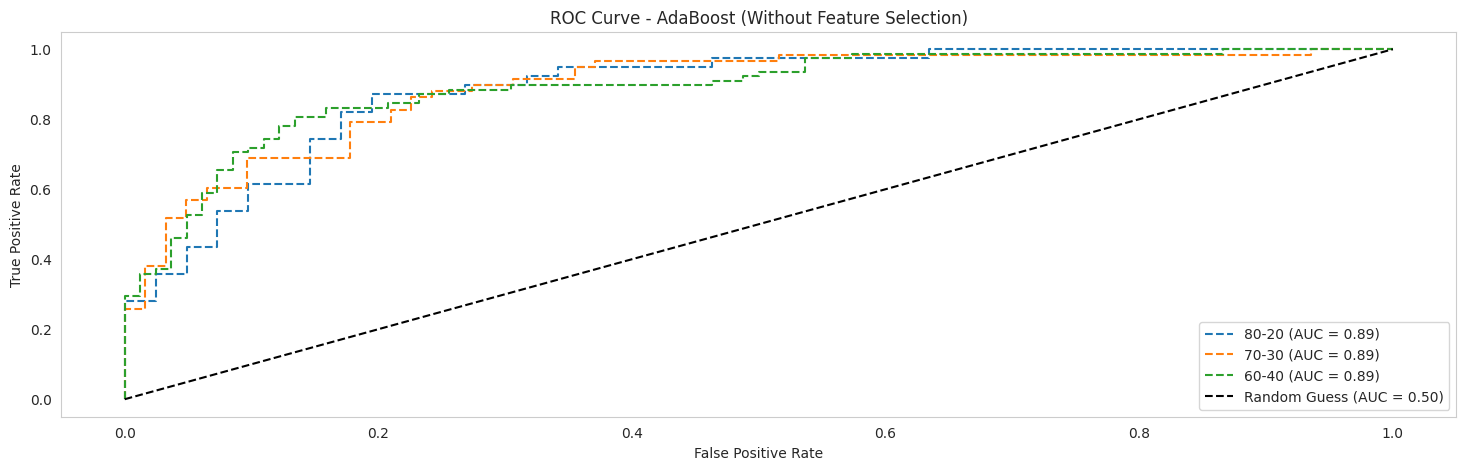


🔹 AdaBoost Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.825000   0.790698  0.871795  0.829268  0.885553
70-30  0.791667   0.779661  0.793103  0.786325  0.889321
60-40  0.818750   0.781609  0.871795  0.824242  0.889775

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


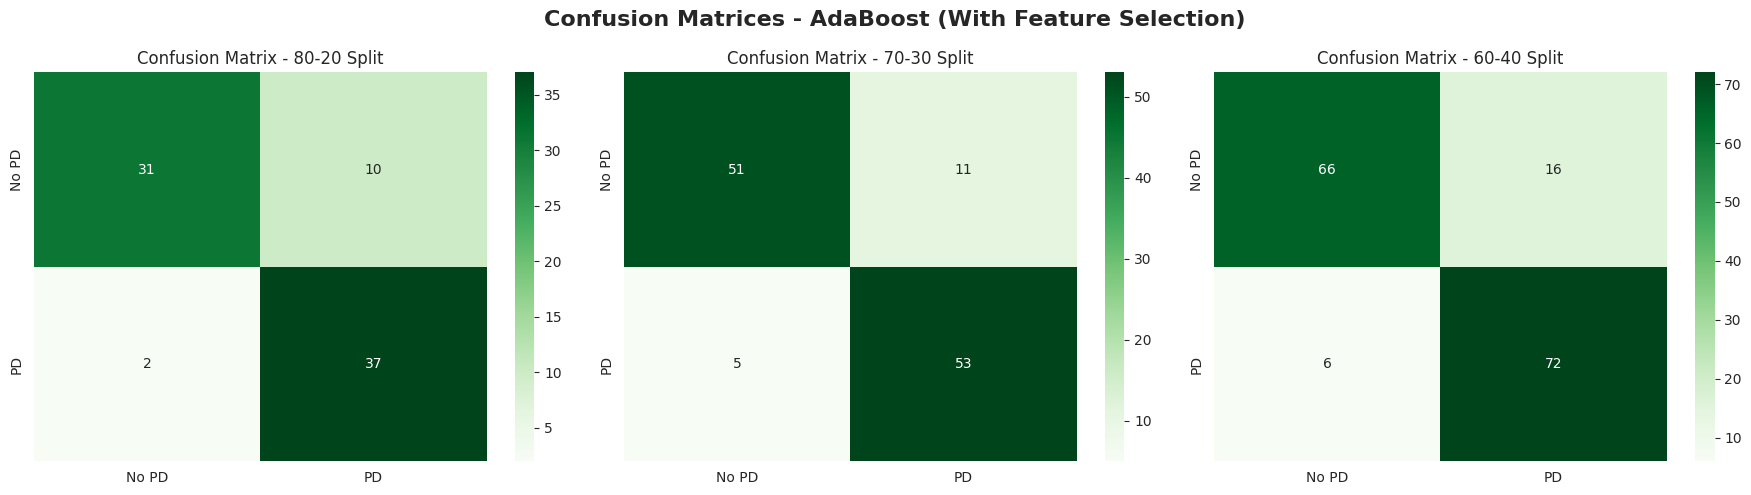

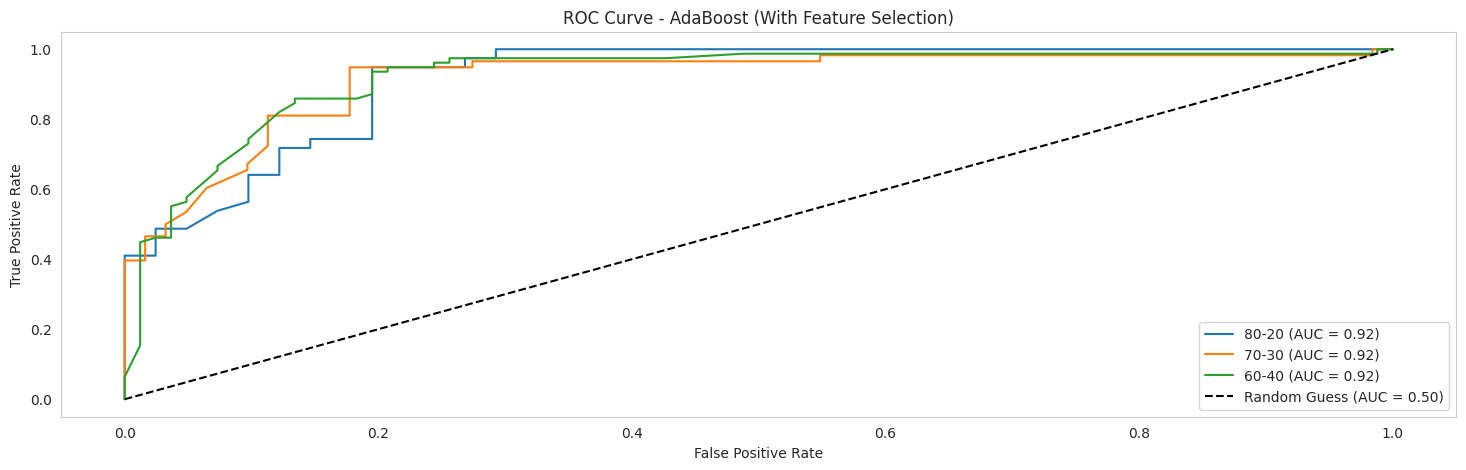


🔹 AdaBoost Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.850000   0.787234  0.948718  0.860465  0.917761
70-30  0.866667   0.828125  0.913793  0.868852  0.915879
60-40  0.862500   0.818182  0.923077  0.867470  0.922842

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 80-20
   - Accuracy: 0.82%
   - AUC: 0.89%

✅ [WITH FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.87%
   - AUC: 0.92%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.87%, AUC: 0.92%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Function to train and evaluate the AdaBoost model
def train_evaluate_adaboost(X_train, X_test, y_train, y_test):
    ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
    ab_model.fit(X_train, y_train)

    y_pred = ab_model.predict(X_test)
    y_prob = ab_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
ab_results_all = {}
ab_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training AdaBoost on {split} Split...")

    # Train on all features (Without Feature Selection)
    ab_results_all[split] = train_evaluate_adaboost(
        X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split]
    )

    # Train on selected features (With Feature Selection - Top 5 Features)
    ab_results_selected[split] = train_evaluate_adaboost(
        X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split]
    )

# Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
ab_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": ab_results_all[split][1],
        "Precision": ab_results_all[split][2],
        "Recall": ab_results_all[split][3],
        "F1-Score": ab_results_all[split][4],
        "AUC": ab_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - AdaBoost (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(ab_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in ab_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - AdaBoost (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 AdaBoost Performance WITHOUT Feature Selection:")
print(ab_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

ab_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": ab_results_selected[split][1],
        "Precision": ab_results_selected[split][2],
        "Recall": ab_results_selected[split][3],
        "F1-Score": ab_results_selected[split][4],
        "AUC": ab_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - AdaBoost (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(ab_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in ab_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - AdaBoost (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 AdaBoost Performance WITH Feature Selection:")
print(ab_metrics_df_selected)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = ab_metrics_df_all["Accuracy"].idxmax()
best_acc_all = ab_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = ab_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = ab_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = ab_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = ab_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
ab_metrics_df_all = ab_metrics_df_all * 100
ab_metrics_df_selected = ab_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")


print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")

print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")

print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


6.4) Gradient Boosting


🔹 Training Gradient Boosting on 80-20 Split...

🔹 Training Gradient Boosting on 70-30 Split...

🔹 Training Gradient Boosting on 60-40 Split...


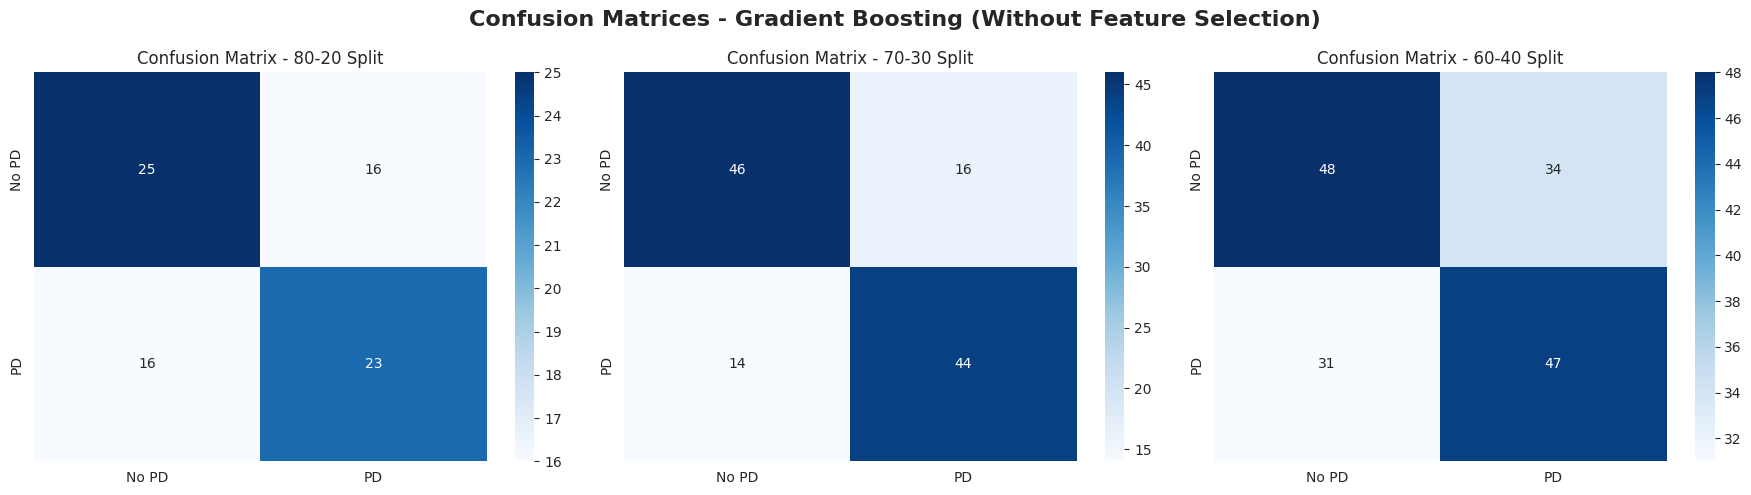

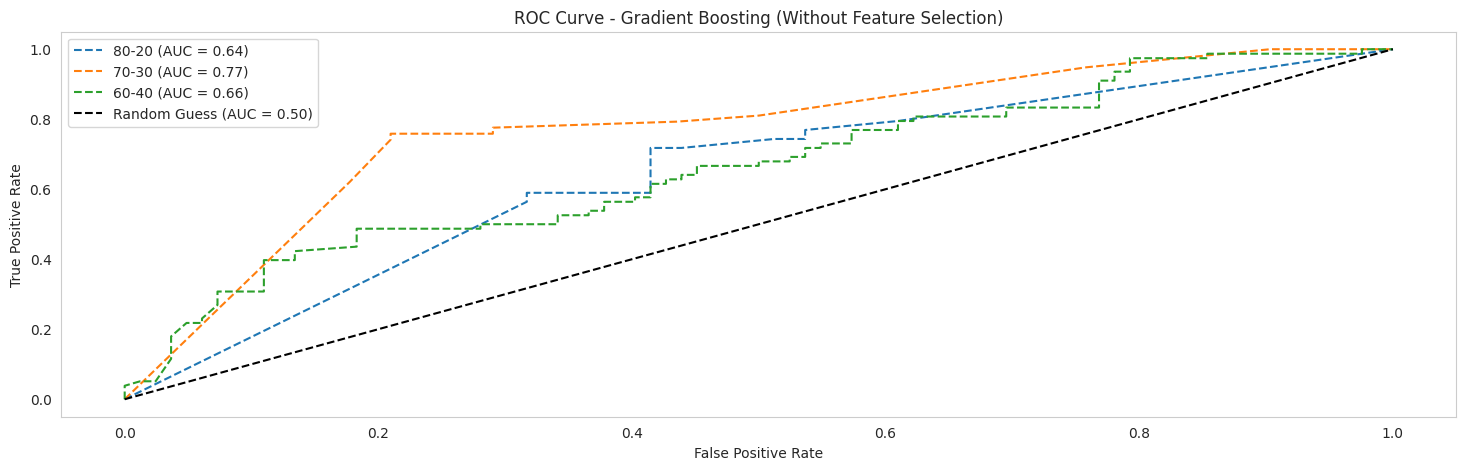


🔹 Gradient Boosting Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20   0.60000   0.589744  0.589744  0.589744  0.643527
70-30   0.75000   0.733333  0.758621  0.745763  0.768910
60-40   0.59375   0.580247  0.602564  0.591195  0.662133

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


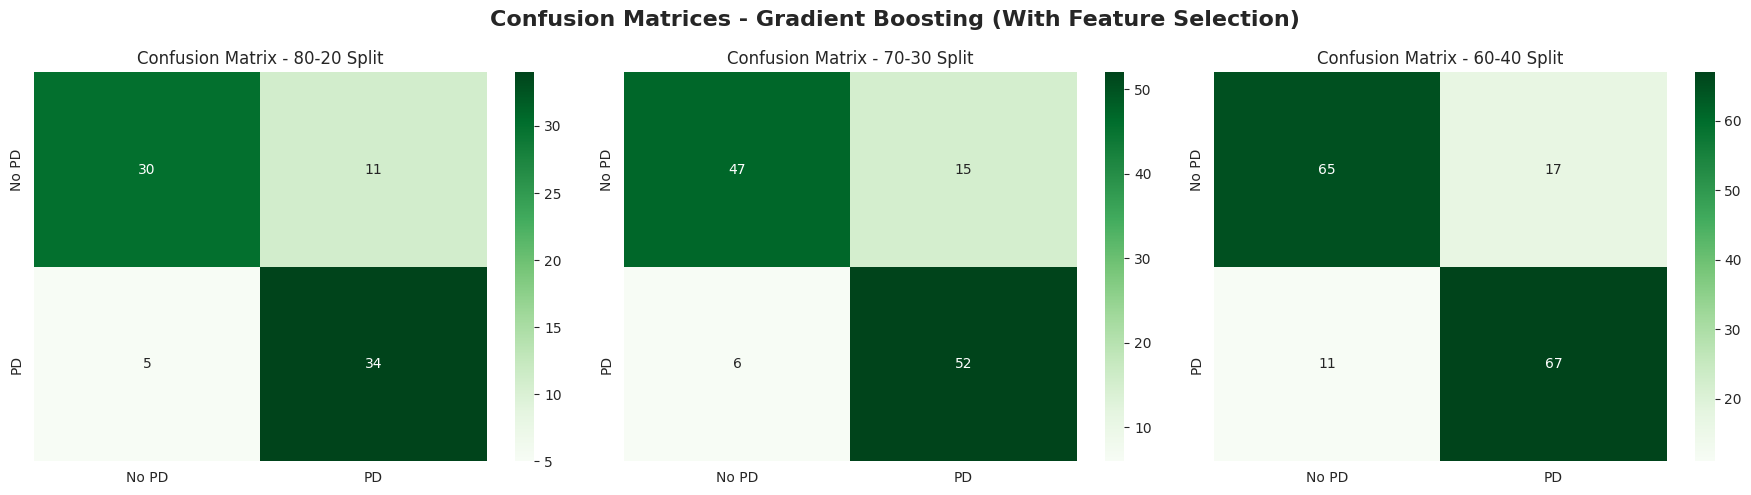

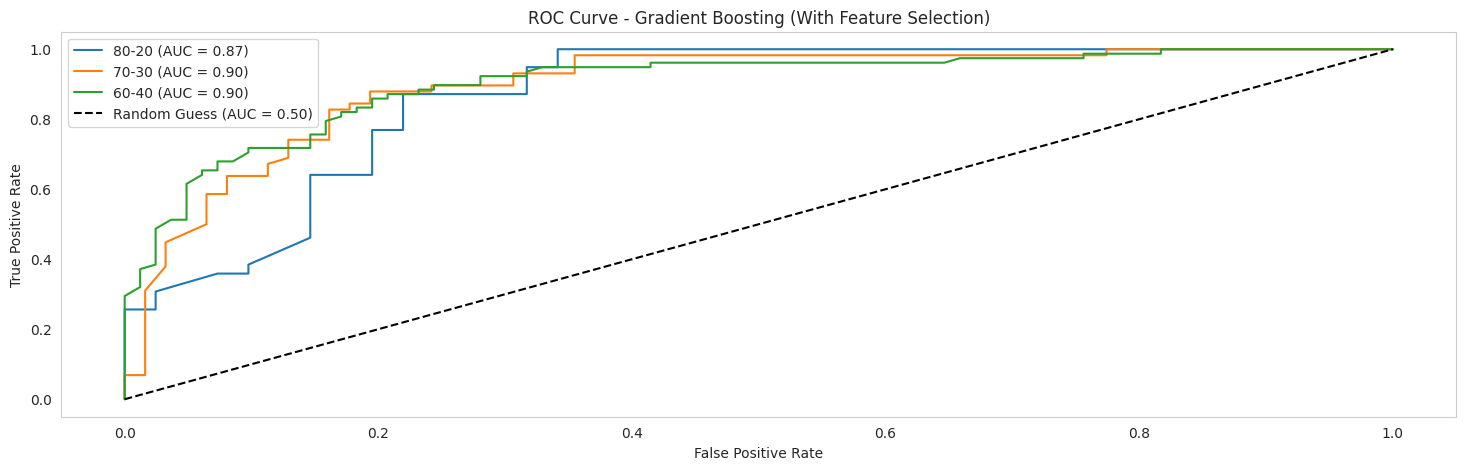


🔹 Gradient Boosting Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20     0.800   0.755556  0.871795  0.809524  0.868668
70-30     0.825   0.776119  0.896552  0.832000  0.897247
60-40     0.825   0.797619  0.858974  0.827160  0.901657

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.75%
   - AUC: 0.77%

✅ [WITH FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.82%
   - AUC: 0.90%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.82%, AUC: 0.90%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Function to train and evaluate the Gradient Boosting model
def train_evaluate_gb(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)
    y_prob = gb_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
gb_results_all = {}
gb_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training Gradient Boosting on {split} Split...")

    # Train on all features (Without Feature Selection)
    gb_results_all[split] = train_evaluate_gb(
        X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split]
    )

    # Train on selected features (With Feature Selection - Top 5 Features)
    gb_results_selected[split] = train_evaluate_gb(
        X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split]
    )
# Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
gb_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": gb_results_all[split][1],
        "Precision": gb_results_all[split][2],
        "Recall": gb_results_all[split][3],
        "F1-Score": gb_results_all[split][4],
        "AUC": gb_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Gradient Boosting (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(gb_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in gb_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Gradient Boosting (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Gradient Boosting Performance WITHOUT Feature Selection:")
print(gb_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

gb_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": gb_results_selected[split][1],
        "Precision": gb_results_selected[split][2],
        "Recall": gb_results_selected[split][3],
        "F1-Score": gb_results_selected[split][4],
        "AUC": gb_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Gradient Boosting (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(gb_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in gb_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Gradient Boosting (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Gradient Boosting Performance WITH Feature Selection:")
print(gb_metrics_df_selected)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = gb_metrics_df_all["Accuracy"].idxmax()
best_acc_all = gb_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = gb_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = gb_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = gb_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = gb_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
gb_metrics_df_all = gb_metrics_df_all * 100
gb_metrics_df_selected = gb_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")


print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")

print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")

print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


6.5) Stacking


🔹 Training Stacking Classifier on 80-20 Split...

🔹 Training Stacking Classifier on 70-30 Split...

🔹 Training Stacking Classifier on 60-40 Split...


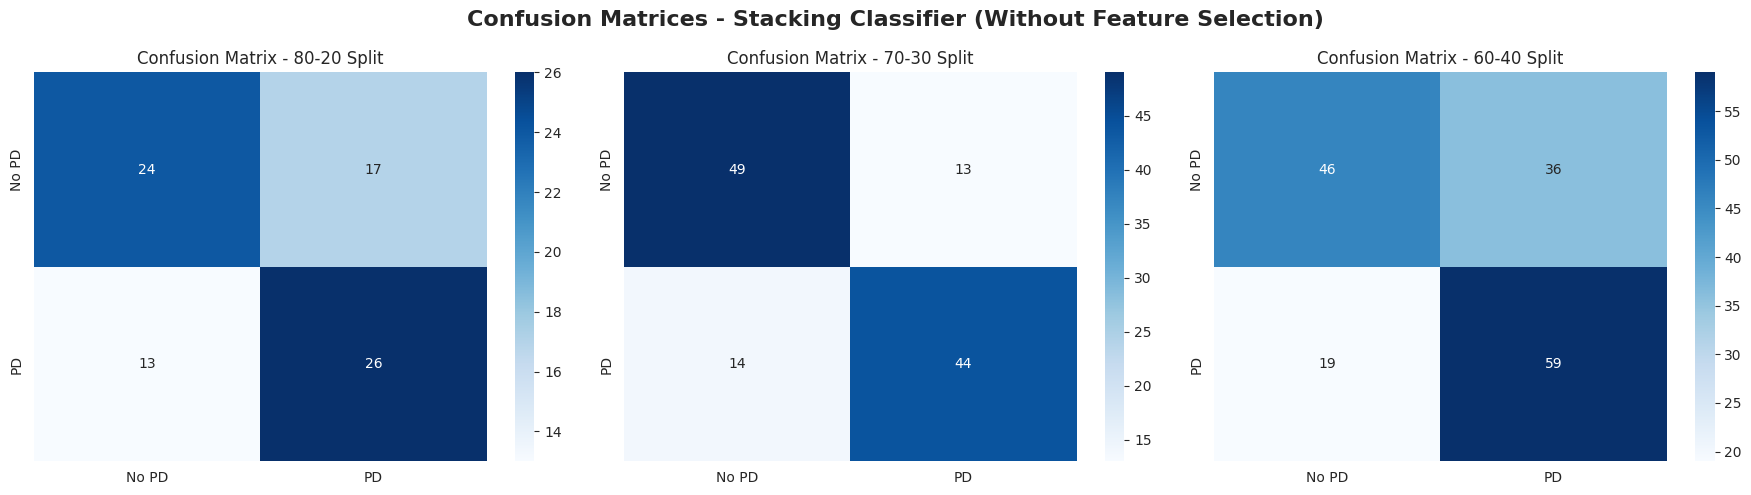

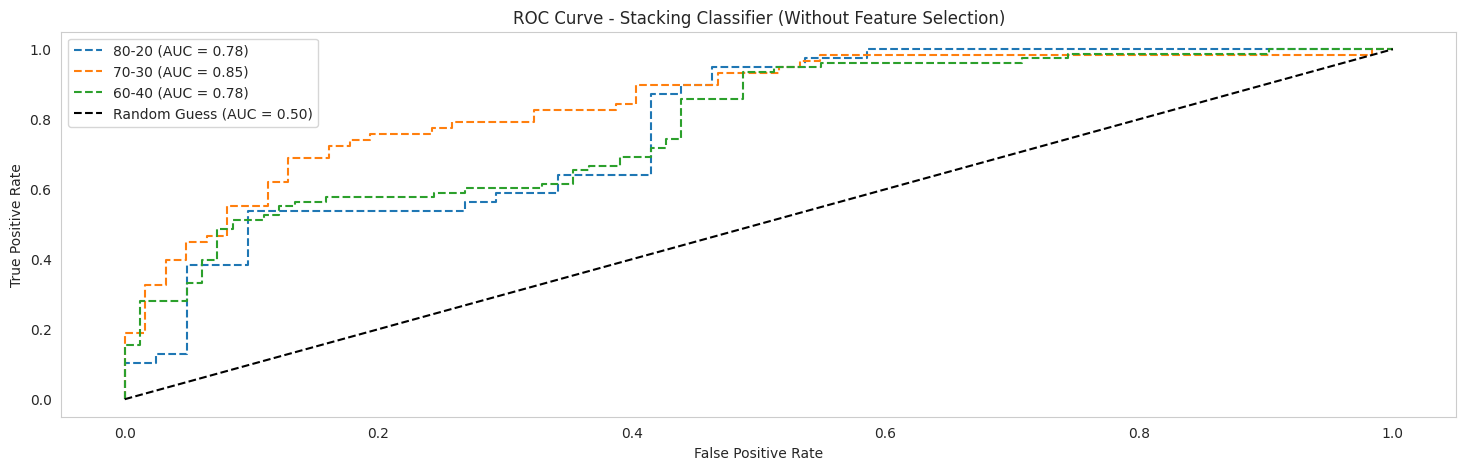


🔹 Stacking Classifier Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20   0.62500   0.604651  0.666667  0.634146  0.780488
70-30   0.77500   0.771930  0.758621  0.765217  0.848443
60-40   0.65625   0.621053  0.756410  0.682081  0.782364

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


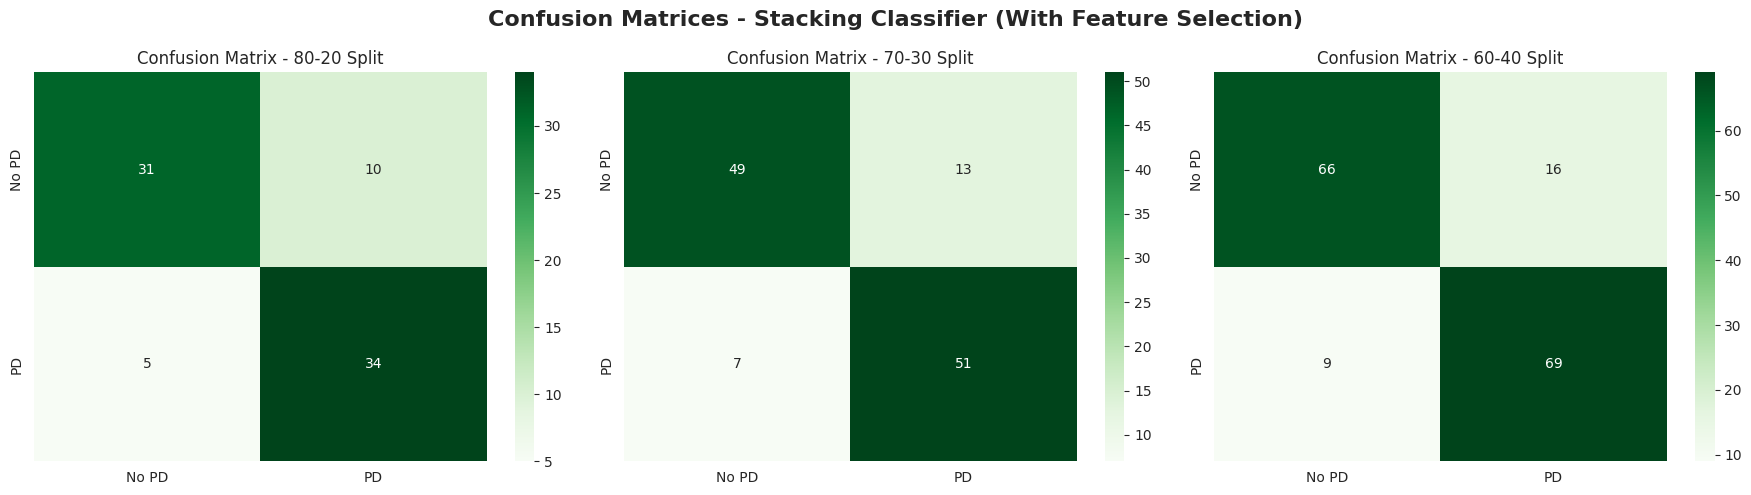

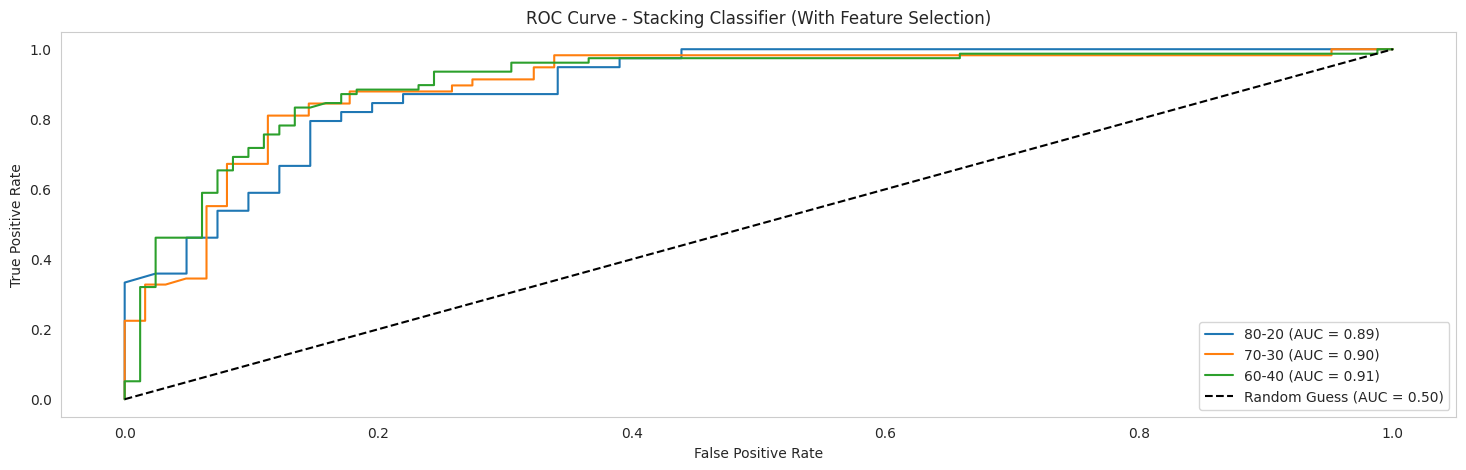


🔹 Stacking Classifier Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.812500   0.772727  0.871795  0.819277  0.893371
70-30  0.833333   0.796875  0.879310  0.836066  0.899472
60-40  0.843750   0.811765  0.884615  0.846626  0.906113

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.78%
   - AUC: 0.85%

✅ [WITH FEATURE SELECTION]

 - Best Split: 60-40
   - Accuracy: 0.84%
   - AUC: 0.91%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.84%, AUC: 0.91%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Stacking Classifier with Logistic Regression as final estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000, random_state=42))

# Function to train and evaluate the Stacking model
def train_evaluate_stacking(X_train, X_test, y_train, y_test):
    stacking_model.fit(X_train, y_train)

    y_pred = stacking_model.predict(X_test)
    y_prob = stacking_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
stacking_results_all = {}
stacking_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training Stacking Classifier on {split} Split...")

    # Train on all features (Without Feature Selection)
    stacking_results_all[split] = train_evaluate_stacking(
        X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split]
    )

    # Train on selected features (With Feature Selection - Top 5 Features)
    stacking_results_selected[split] = train_evaluate_stacking(
        X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split]
    )

 # Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
stacking_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": stacking_results_all[split][1],
        "Precision": stacking_results_all[split][2],
        "Recall": stacking_results_all[split][3],
        "F1-Score": stacking_results_all[split][4],
        "AUC": stacking_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Stacking Classifier (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(stacking_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in stacking_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Stacking Classifier (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Stacking Classifier Performance WITHOUT Feature Selection:")
print(stacking_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

stacking_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": stacking_results_selected[split][1],
        "Precision": stacking_results_selected[split][2],
        "Recall": stacking_results_selected[split][3],
        "F1-Score": stacking_results_selected[split][4],
        "AUC": stacking_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Stacking Classifier (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(stacking_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in stacking_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Stacking Classifier (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Stacking Classifier Performance WITH Feature Selection:")
print(stacking_metrics_df_selected)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = stacking_metrics_df_all["Accuracy"].idxmax()
best_acc_all = stacking_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = stacking_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = stacking_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = stacking_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = stacking_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
stacking_metrics_df_all = stacking_metrics_df_all * 100
stacking_metrics_df_selected = stacking_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")


print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")

print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")

print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


6.6) Bagging


🔹 Training Bagging Classifier on 80-20 Split...

🔹 Training Bagging Classifier on 70-30 Split...

🔹 Training Bagging Classifier on 60-40 Split...


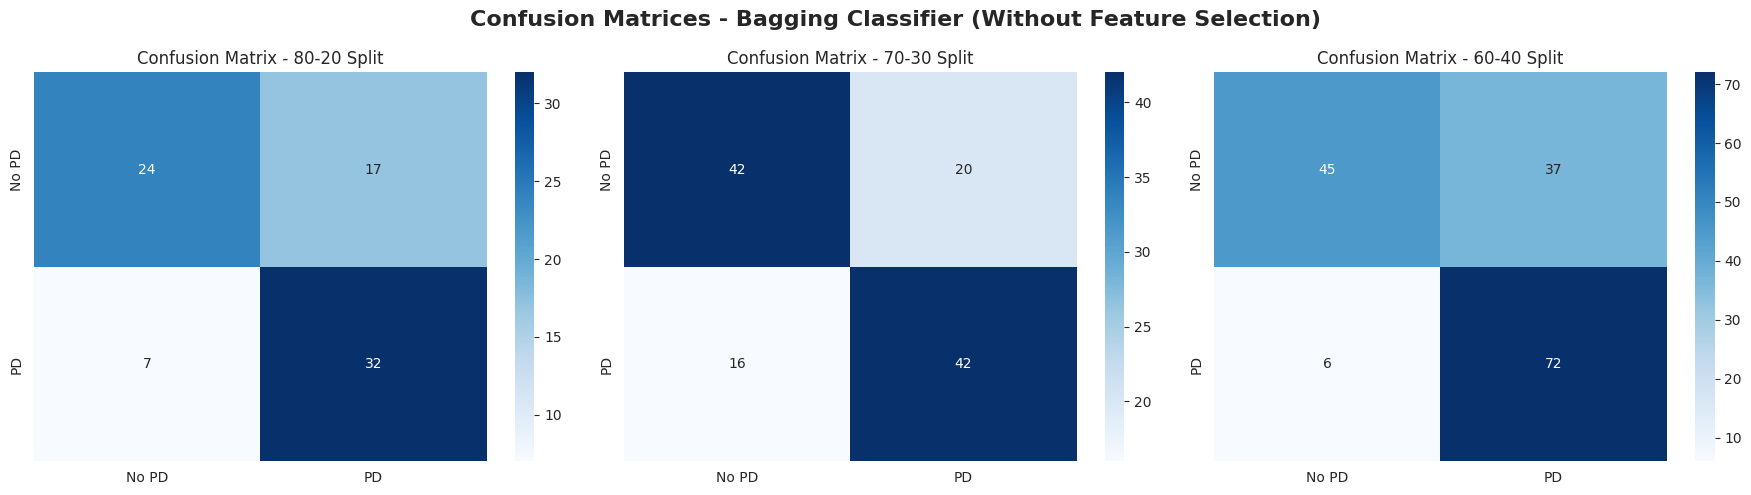

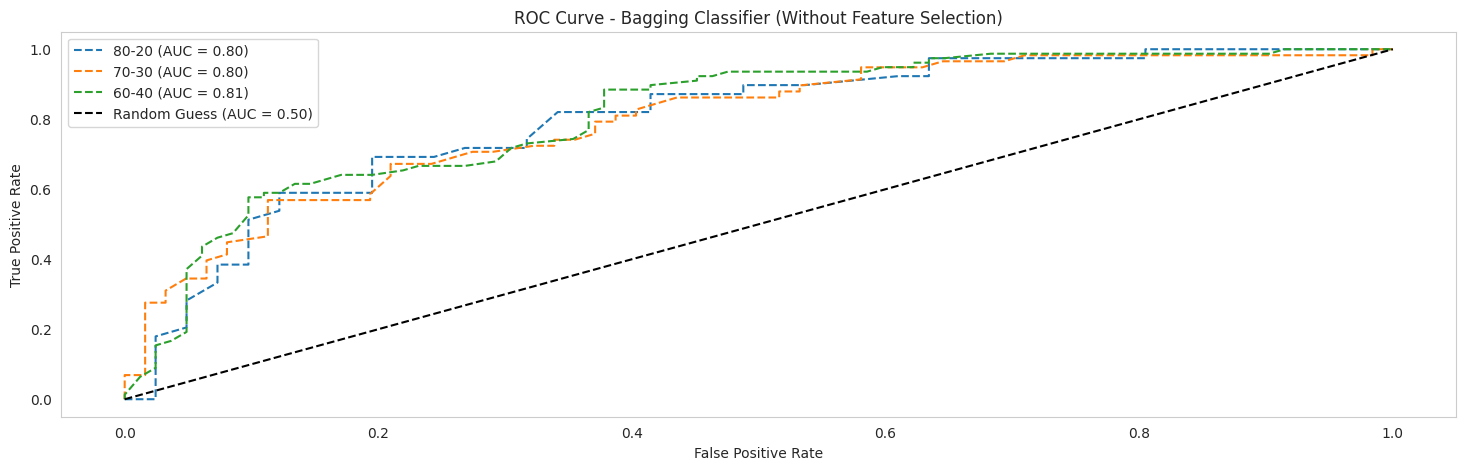


🔹 Bagging Classifier Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20   0.70000   0.653061  0.820513  0.727273  0.800813
70-30   0.70000   0.677419  0.724138  0.700000  0.797553
60-40   0.73125   0.660550  0.923077  0.770053  0.814962

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


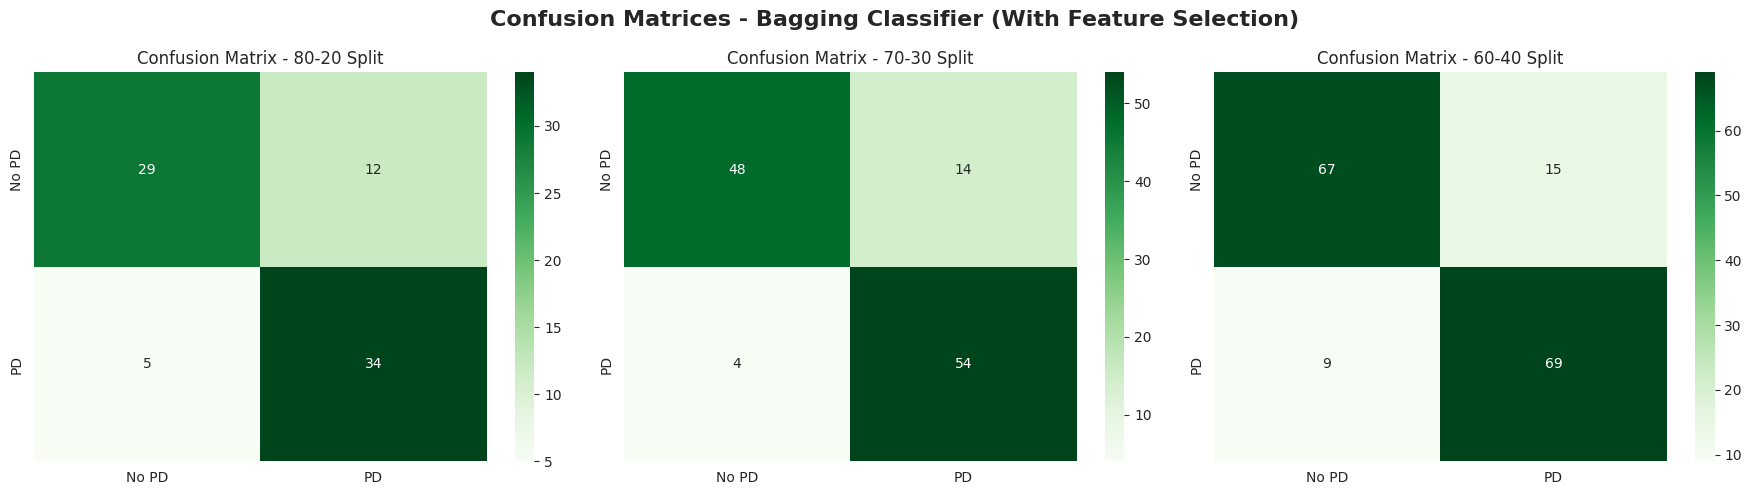

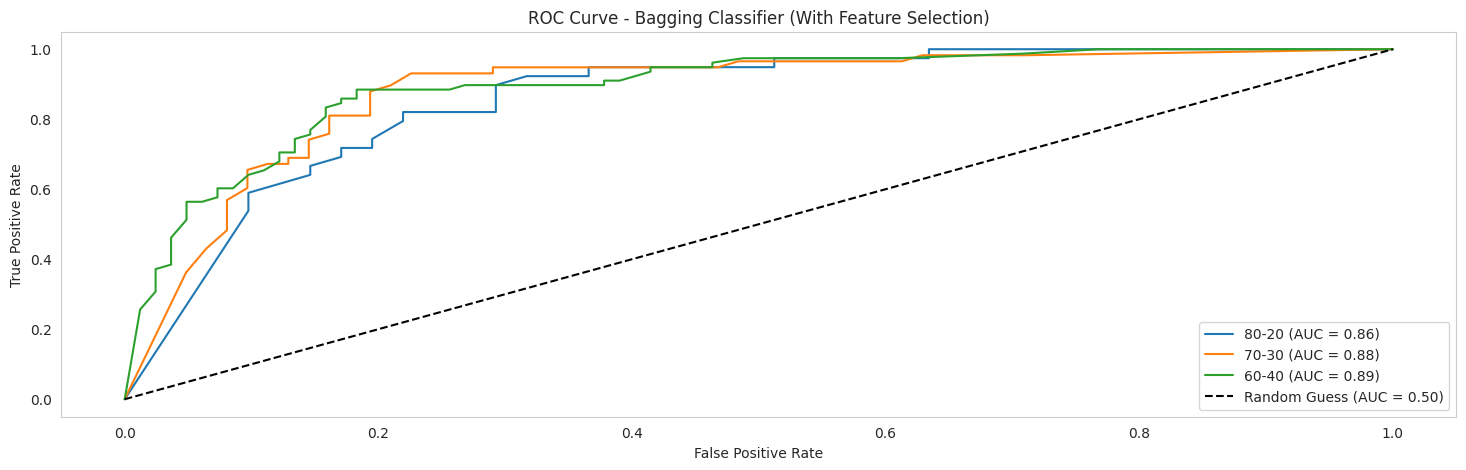


🔹 Bagging Classifier Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20    0.7875   0.739130  0.871795  0.800000  0.859912
70-30    0.8500   0.794118  0.931034  0.857143  0.883065
60-40    0.8500   0.821429  0.884615  0.851852  0.892824

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 60-40
   - Accuracy: 0.73%
   - AUC: 0.81%

✅ [WITH FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.85%
   - AUC: 0.88%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.85%, AUC: 0.88%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Initialize Bagging Classifier with Decision Tree as base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Function to train and evaluate the Bagging model
def train_evaluate_bagging(X_train, X_test, y_train, y_test):
    bagging_model.fit(X_train, y_train)

    y_pred = bagging_model.predict(X_test)
    y_prob = bagging_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
bagging_results_all = {}
bagging_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training Bagging Classifier on {split} Split...")

    # Train on all features (Without Feature Selection)
    bagging_results_all[split] = train_evaluate_bagging(
        X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split]
    )

    # Train on selected features (With Feature Selection - Top 5 Features)
    bagging_results_selected[split] = train_evaluate_bagging(
        X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split]
    )

# Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
bagging_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": bagging_results_all[split][1],
        "Precision": bagging_results_all[split][2],
        "Recall": bagging_results_all[split][3],
        "F1-Score": bagging_results_all[split][4],
        "AUC": bagging_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Bagging Classifier (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(bagging_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in bagging_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Bagging Classifier (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Bagging Classifier Performance WITHOUT Feature Selection:")
print(bagging_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

bagging_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": bagging_results_selected[split][1],
        "Precision": bagging_results_selected[split][2],
        "Recall": bagging_results_selected[split][3],
        "F1-Score": bagging_results_selected[split][4],
        "AUC": bagging_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Bagging Classifier (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(bagging_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in bagging_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Bagging Classifier (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Bagging Classifier Performance WITH Feature Selection:")
print(bagging_metrics_df_selected)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = bagging_metrics_df_all["Accuracy"].idxmax()
best_acc_all = bagging_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = bagging_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = bagging_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = bagging_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = bagging_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
bagging_metrics_df_all = bagging_metrics_df_all * 100
bagging_metrics_df_selected = bagging_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")


print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")

print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")

print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


6.7) Voting


🔹 Training Voting Classifier on 80-20 Split...

🔹 Training Voting Classifier on 70-30 Split...

🔹 Training Voting Classifier on 60-40 Split...


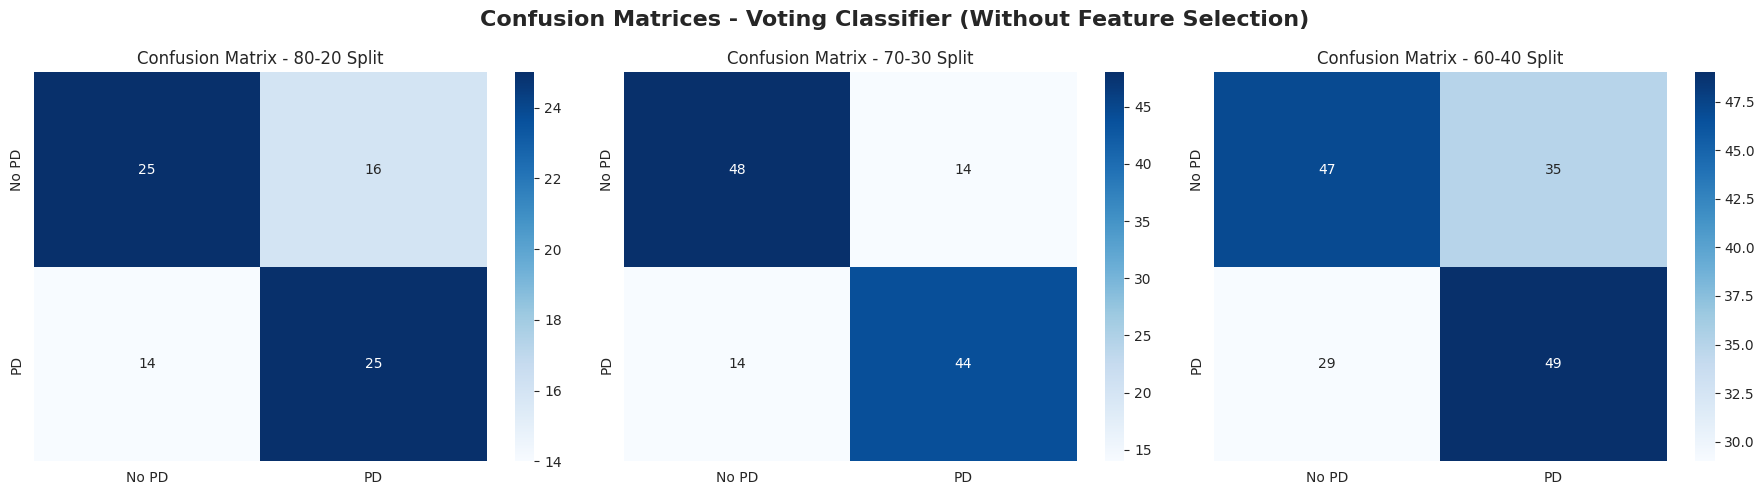

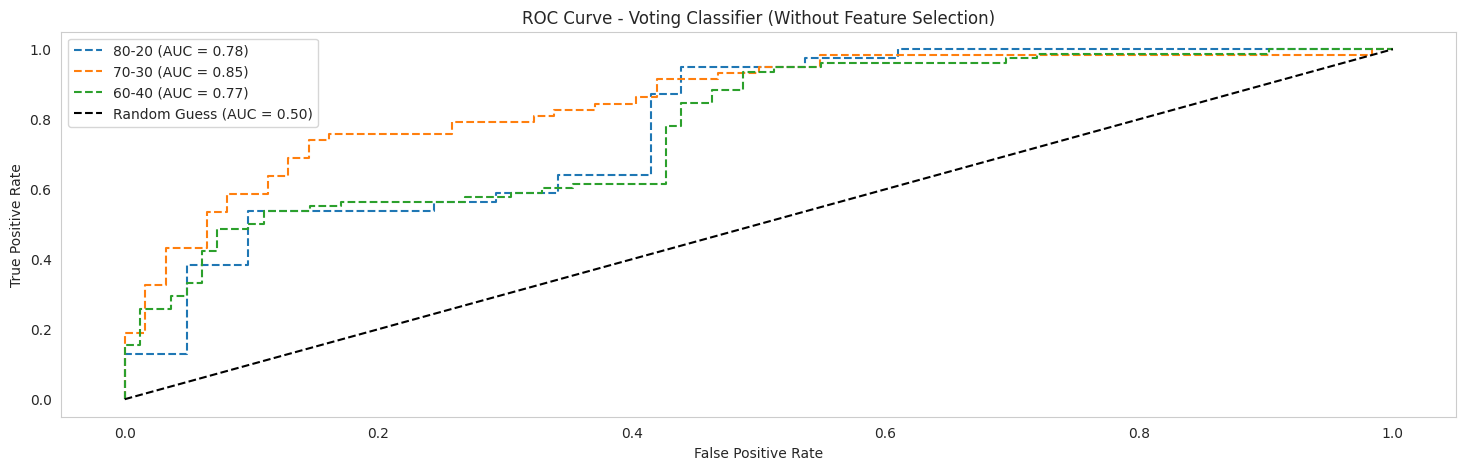


🔹 Voting Classifier Performance WITHOUT Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.625000   0.609756  0.641026  0.625000  0.782364
70-30  0.766667   0.758621  0.758621  0.758621  0.852892
60-40  0.600000   0.583333  0.628205  0.604938  0.774234

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


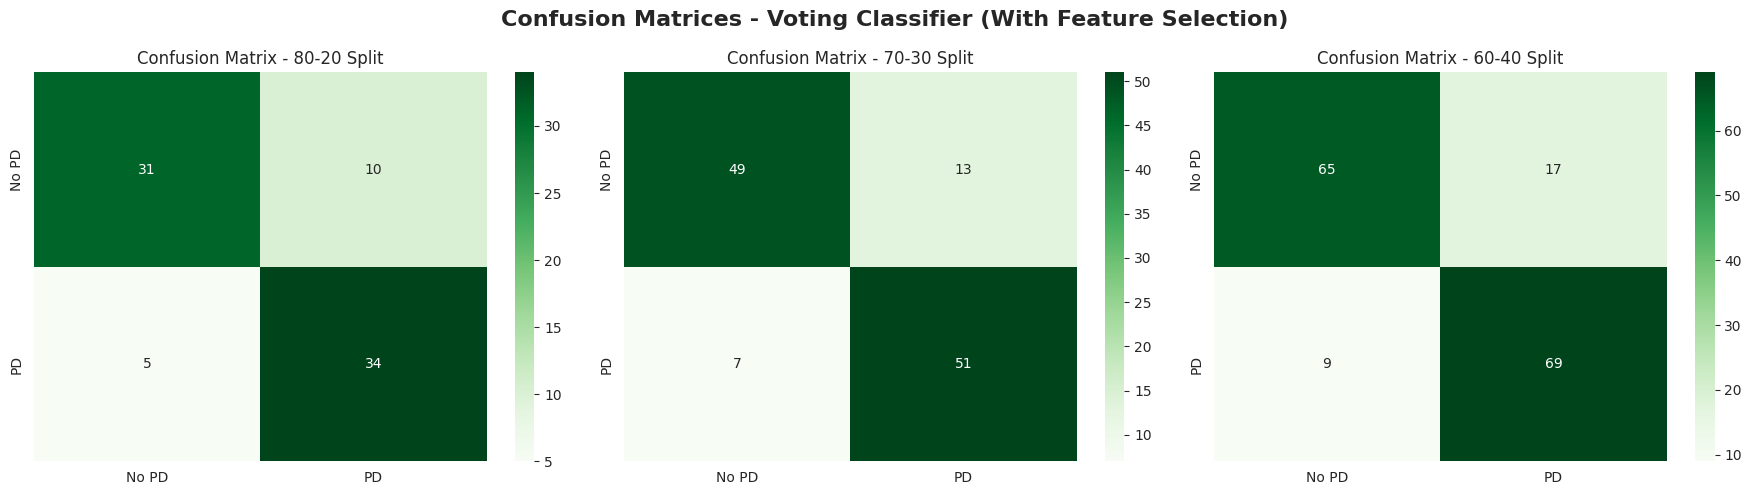

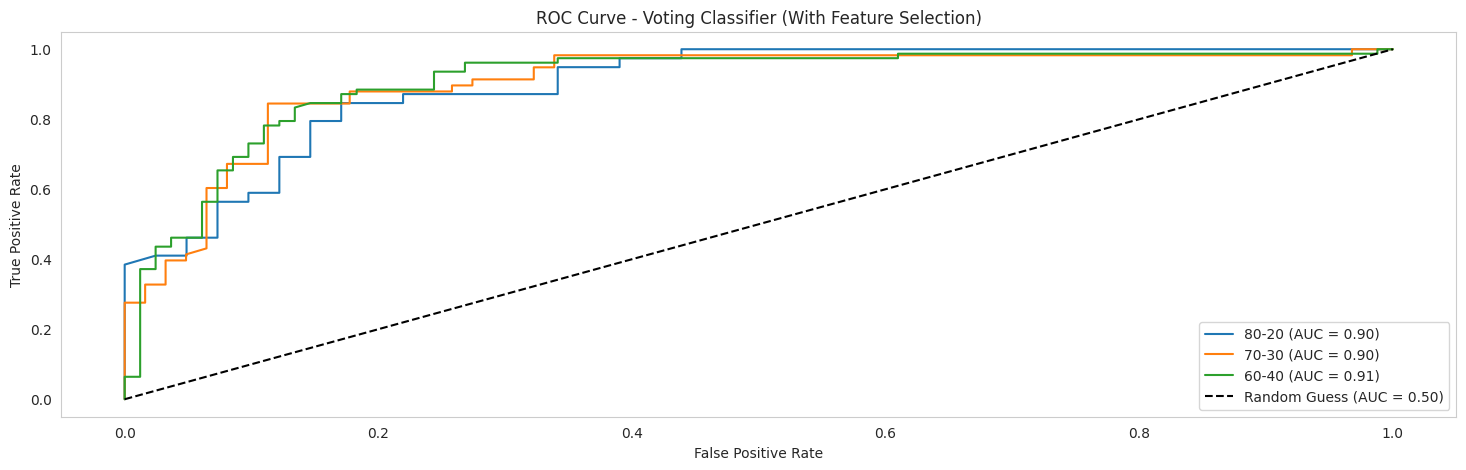


🔹 Voting Classifier Performance WITH Feature Selection:
       Accuracy  Precision    Recall  F1-Score       AUC
80-20  0.812500   0.772727  0.871795  0.819277  0.897749
70-30  0.833333   0.796875  0.879310  0.836066  0.904199
60-40  0.837500   0.802326  0.884615  0.841463  0.908771

 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🔹 FINAL PERFORMANCE COMPARISON:

✅ [WITHOUT FEATURE SELECTION]

 - Best Split: 70-30
   - Accuracy: 0.77%
   - AUC: 0.85%

✅ [WITH FEATURE SELECTION]

 - Best Split: 60-40
   - Accuracy: 0.84%
   - AUC: 0.91%

🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!
   - [BEST MODEL] **With Feature Selection** (Accuracy: 0.84%, AUC: 0.91%)

🔹 Best Feature Selection Method: Univariate Selection


In [ ]:
# Define base models for voting
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Initialize Voting Classifier (Soft Voting)
voting_model = VotingClassifier(
    estimators=base_models,
    voting='soft'  # Use 'soft' voting to consider probability outputs
)

# Function to train and evaluate the Voting model
def train_evaluate_voting(X_train, X_test, y_train, y_test):
    voting_model.fit(X_train, y_train)

    y_pred = voting_model.predict(X_test)
    y_prob = voting_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return cm, accuracy, precision, recall, f1, fpr, tpr, auc_score

# Store results for each train-test split
voting_results_all = {}
voting_results_selected = {}

for split in splits.keys():
    print(f"\n🔹 Training Voting Classifier on {split} Split...")

    # Train on all features (Without Feature Selection)
    voting_results_all[split] = train_evaluate_voting(
        X_train_all_bal[split], X_test_all[split], y_train_all_bal[split], y_test_all[split]
    )

    # Train on selected features (With Feature Selection - Top 5 Features)
    voting_results_selected[split] = train_evaluate_voting(
        X_train_selected_bal[split], X_test_selected[split], y_train_selected_bal[split], y_test_selected[split]
    )

# Identify best feature selection method
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

best_fs_method = None
best_fs_accuracy = 0
for method, features in feature_selection_methods.items():
    if len(set(top5_features) & features) > best_fs_accuracy:
        best_fs_accuracy = len(set(top5_features) & features)
        best_fs_method = method

# Convert results to structured format
voting_metrics_df_all = pd.DataFrame.from_dict({
    split: {
        "Accuracy": voting_results_all[split][1],
        "Precision": voting_results_all[split][2],
        "Recall": voting_results_all[split][3],
        "F1-Score": voting_results_all[split][4],
        "AUC": voting_results_all[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITHOUT feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Voting Classifier (Without Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(voting_results_all.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITHOUT feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in voting_results_all.items():
    ax.plot(fpr, tpr, linestyle='--', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Voting Classifier (Without Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Voting Classifier Performance WITHOUT Feature Selection:")
print(voting_metrics_df_all)
print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- With Feature Selection ------------------------------- #

voting_metrics_df_selected = pd.DataFrame.from_dict({
    split: {
        "Accuracy": voting_results_selected[split][1],
        "Precision": voting_results_selected[split][2],
        "Recall": voting_results_selected[split][3],
        "F1-Score": voting_results_selected[split][4],
        "AUC": voting_results_selected[split][7]
    }
    for split in splits.keys()
}, orient="index")

# Plot Confusion Matrices WITH feature selection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices - Voting Classifier (With Feature Selection)", fontsize=16, fontweight="bold")

for i, (split, (cm, *_)) in enumerate(voting_results_selected.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {split} Split")

plt.tight_layout()
plt.show()

# Plot ROC Curve WITH feature selection
fig, ax = plt.subplots(figsize=(18, 5))

for split, (_, _, _, _, _, fpr, tpr, auc_score) in voting_results_selected.items():
    ax.plot(fpr, tpr, linestyle='-', label=f"{split} (AUC = {auc_score:.2f})")

ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Voting Classifier (With Feature Selection)")
ax.legend()
ax.grid()
plt.show()

print("\n🔹 Voting Classifier Performance WITH Feature Selection:")
print(voting_metrics_df_selected)

print("\n -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# ------------------------------- Final Comparison ------------------------------- #

# Identify the best split for each case
best_split_all = voting_metrics_df_all["Accuracy"].idxmax()
best_acc_all = voting_metrics_df_all.loc[best_split_all, "Accuracy"]
best_auc_all = voting_metrics_df_all.loc[best_split_all, "AUC"]

best_split_selected = voting_metrics_df_selected["Accuracy"].idxmax()
best_acc_selected = voting_metrics_df_selected.loc[best_split_selected, "Accuracy"]
best_auc_selected = voting_metrics_df_selected.loc[best_split_selected, "AUC"]

# Convert values to percentage format
voting_metrics_df_all = voting_metrics_df_all * 100
voting_metrics_df_selected = voting_metrics_df_selected * 100

# Print final best performing model summary with prefix
print("\n🔹 FINAL PERFORMANCE COMPARISON:")

print(f"\n✅ [WITHOUT FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_all}")
print(f"   - Accuracy: {best_acc_all:.2f}%")
print(f"   - AUC: {best_auc_all:.2f}%")


print(f"\n✅ [WITH FEATURE SELECTION]")
print(f"\n - Best Split: {best_split_selected}")
print(f"   - Accuracy: {best_acc_selected:.2f}%")
print(f"   - AUC: {best_auc_selected:.2f}%")

# Determine whether feature selection improved the model
if best_acc_selected > best_acc_all:
    print(f"\n🚀 [RESULT] Feature Selection **IMPROVED** Accuracy & AUC!")
    print(f"   - [BEST MODEL] **With Feature Selection** (Accuracy: {best_acc_selected:.2f}%, AUC: {best_auc_selected:.2f}%)")
else:
    print(f"\n🚀 [RESULT] Feature Selection **DID NOT** Improve Accuracy & AUC!")
    print(f"   - [BEST MODEL] **Without Feature Selection** (Accuracy: {best_acc_all:.2f}%, AUC: {best_auc_all:.2f}%)")

print(f"\n🔹 Best Feature Selection Method: {best_fs_method}")


**7) Summary & Result**

In [ ]:
# Dictionary containing all model performances
models_performance = {
    "Random Forest": (rf_metrics_df_all, rf_metrics_df_selected),
    "AdaBoost": (ab_metrics_df_all, ab_metrics_df_selected),
    "Gradient Boosting": (gb_metrics_df_all, gb_metrics_df_selected),
    "Stacking": (stacking_metrics_df_all, stacking_metrics_df_selected),
    "Bagging": (bagging_metrics_df_all, bagging_metrics_df_selected),
    "Voting": (voting_metrics_df_all, voting_metrics_df_selected)
}

# Feature selection methods
feature_selection_methods = {
    "Univariate Selection": features1,
    "Mutual Information": features2,
    "Lasso Regression": features3,
    "Correlation-based Selection": features4
}

# Prepare comparison tables
comparison_without_fs = []
comparison_with_fs = []
best_models = {}
best_feature_selection_method = {}

for model_name, (df_all, df_selected) in models_performance.items():
    # Best performing split for each model
    best_split_all = df_all["Accuracy"].idxmax()
    best_acc_all = df_all.loc[best_split_all, "Accuracy"]
    best_auc_all = df_all.loc[best_split_all, "AUC"]

    best_split_selected = df_selected["Accuracy"].idxmax()
    best_acc_selected = df_selected.loc[best_split_selected, "Accuracy"]
    best_auc_selected = df_selected.loc[best_split_selected, "AUC"]

    # Store results in comparison tables
    comparison_without_fs.append([model_name, best_split_all, best_acc_all, best_auc_all])
    comparison_with_fs.append([model_name, best_split_selected, best_acc_selected, best_auc_selected])

    # Determine best feature selection method for this model
    best_fs_method = None
    best_fs_accuracy = 0
    for method, features in feature_selection_methods.items():
        if len(set(top5_features) & features) > best_fs_accuracy:
            best_fs_accuracy = len(set(top5_features) & features)
            best_fs_method = method

    best_feature_selection_method[model_name] = best_fs_method

    # Store best models
    best_models[model_name] = {
        "Best Split (Without FS)": best_split_all,
        "Accuracy (Without FS)": best_acc_all,
        "AUC (Without FS)": best_auc_all,
        "Best Split (With FS)": best_split_selected,
        "Accuracy (With FS)": best_acc_selected,
        "AUC (With FS)": best_auc_selected,
        "Best Feature Selection Method": best_fs_method
    }

# Convert comparison data to DataFrame
comparison_df_without_fs = pd.DataFrame(comparison_without_fs, columns=["Model", "Best Split", "Accuracy", "AUC"])
comparison_df_with_fs = pd.DataFrame(comparison_with_fs, columns=["Model", "Best Split", "Accuracy", "AUC"])


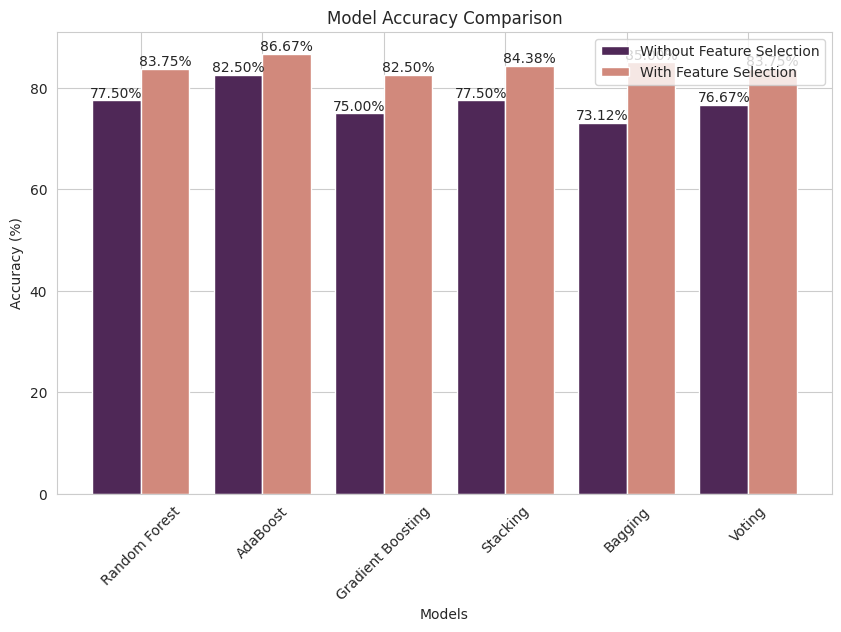


🔹 FINAL BEST MODEL SELECTION:

✅ Best Model Based on **Accuracy**: AdaBoost
   - Best Split: 70-30
   - Accuracy: 86.67%


In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(comparison_df_without_fs["Model"]))

bars1 = plt.bar(index, comparison_df_without_fs["Accuracy"], bar_width, label="Without Feature Selection", color='#4F2857')
bars2 = plt.bar([i + bar_width for i in index], comparison_df_with_fs["Accuracy"], bar_width, label="With Feature Selection", color='#D1897C')

plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks([i + bar_width/2 for i in index], comparison_df_without_fs["Model"], rotation=45)
plt.legend()

# Add percentage values on bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

# ------------------------------- Best Model Selection ------------------------------- #

# Identify the best model based on highest accuracy
best_model_acc = max(best_models, key=lambda x: max(best_models[x]["Accuracy (Without FS)"], best_models[x]["Accuracy (With FS)"]))
best_split_acc = best_models[best_model_acc]["Best Split (With FS)"] if best_models[best_model_acc]["Accuracy (With FS)"] > best_models[best_model_acc]["Accuracy (Without FS)"] else best_models[best_model_acc]["Best Split (Without FS)"]
best_acc = max(best_models[best_model_acc]["Accuracy (Without FS)"], best_models[best_model_acc]["Accuracy (With FS)"])


# Print Best Model Summary
print("\n🔹 FINAL BEST MODEL SELECTION:")

print(f"\n✅ Best Model Based on **Accuracy**: {best_model_acc}")
print(f"   - Best Split: {best_split_acc}")
print(f"   - Accuracy: {best_acc:.2f}%")


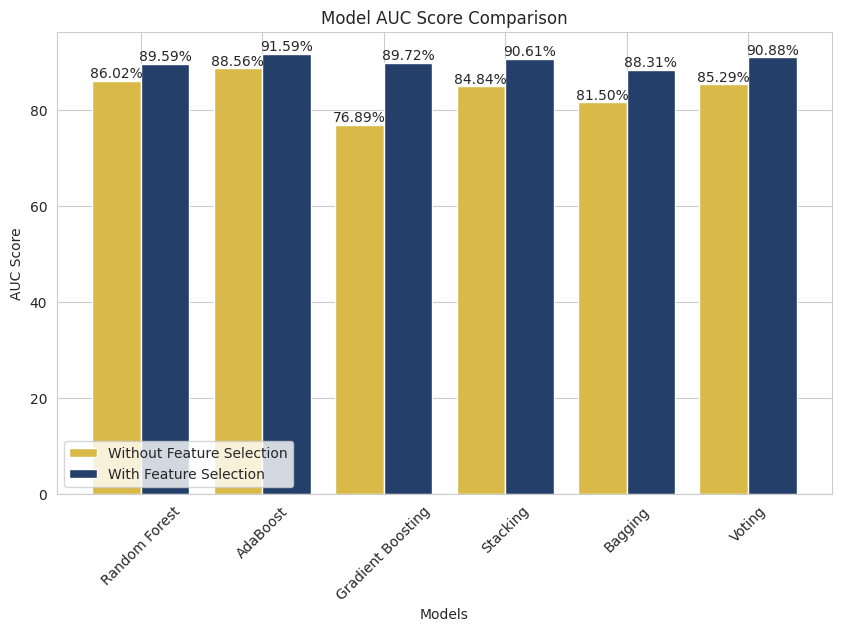


🔹 FINAL BEST MODEL SELECTION:

✅ Best Model Based on **AUC**: AdaBoost
   - Best Split: 70-30
   - AUC: 91.59%


In [ ]:
# Plot AUC Comparison
plt.figure(figsize=(10, 6))
bars3 = plt.bar(index, comparison_df_without_fs["AUC"], bar_width, label="Without Feature Selection", color='#D9BA49')
bars4 = plt.bar([i + bar_width for i in index], comparison_df_with_fs["AUC"], bar_width, label="With Feature Selection", color='#243F6A')

plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("Model AUC Score Comparison")
plt.xticks([i + bar_width/2 for i in index], comparison_df_without_fs["Model"], rotation=45)
plt.legend()

# Add percentage values on bars
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)
for bar in bars4:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

# ------------------------------- Best Model Selection ------------------------------- #

# Identify the best model based on highest AUC
best_model_auc = max(best_models, key=lambda x: max(best_models[x]["AUC (Without FS)"], best_models[x]["AUC (With FS)"]))
best_split_auc = best_models[best_model_auc]["Best Split (With FS)"] if best_models[best_model_auc]["AUC (With FS)"] > best_models[best_model_auc]["AUC (Without FS)"] else best_models[best_model_auc]["Best Split (Without FS)"]
best_auc = max(best_models[best_model_auc]["AUC (Without FS)"], best_models[best_model_auc]["AUC (With FS)"])

# Print Best Model Summary
print("\n🔹 FINAL BEST MODEL SELECTION:")

print(f"\n✅ Best Model Based on **AUC**: {best_model_auc}")
print(f"   - Best Split: {best_split_auc}")
print(f"   - AUC: {best_auc:.2f}%")


In [ ]:
print(best_model_acc)
print(best_model_auc)
print(top5_features)

AdaBoost
AdaBoost
['UPDRS', 'Tremor', 'FunctionalAssessment', 'MoCA', 'Rigidity']


In [25]:
columns_to_print = ['UPDRS', 'Tremor', 'FunctionalAssessment', 'MoCA', 'Rigidity', 'Diagnosis']
df_selected = dataset[columns_to_print].head(50)
print(tabulate(df_selected[columns_to_print], headers='keys', tablefmt='grid'))


+----+-----------+----------+------------------------+-----------+------------+-------------+
|    |     UPDRS |   Tremor |   FunctionalAssessment |      MoCA |   Rigidity |   Diagnosis |
+====+===========+==========+========================+===========+============+=============+
|  0 |   6.45871 |        1 |              1.57243   | 29.1813   |          0 |           0 |
+----+-----------+----------+------------------------+-----------+------------+-------------+
|  1 |  37.3067  |        0 |              4.78755   | 12.3326   |          1 |           1 |
+----+-----------+----------+------------------------+-----------+------------+-------------+
|  2 |  67.8382  |        1 |              2.13069   | 29.9278   |          0 |           1 |
+----+-----------+----------+------------------------+-----------+------------+-------------+
|  3 |  52.9647  |        1 |              3.39129   | 21.3043   |          1 |           1 |
+----+-----------+----------+------------------------+------

In [ ]:
# import joblib
# from google.colab import files

# # Save the best model
# joblib.dump(best_model, 'best_model.pkl')

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Save the scaler (if applicable)
# joblib.dump(scaler, 'scaler.pkl')

# print("Model and Scaler Saved Successfully!")

# # Download the files
# files.download('best_model.pkl')
# files.download('scaler.pkl')
